# Scikit Learn (sklearn)

In [459]:
!pip install -U scikit-learn

In [460]:
import sklearn

In [461]:
# Banco de dados que será usado nas próximas lições.

import pandas
Carros = pandas.read_csv("..\ArquivosParalelos\carros.csv")

In [462]:
import numpy
import matplotlib.pyplot as plt

## Notas sobre matrizes

Muitos dos testes estão preparados para processar dados em matrizes - como normalmente é encontrado, de forma estruturada. Para fazer previsão de algum ponto em particular, é intuitivo fornecer apenas as coordenadas do ponto, entretanto, isso constitui uma matriz unidimencional. Isso pode levar ao erro "ValueError: Expected 2D array, got 1D array instead".

In [463]:
point = [1.2, 2.3, 3.4]
print(point)

point_array = numpy.array(point).reshape(1, -1)
print(point_array)

[1.2, 2.3, 3.4]
[[1.2 2.3 3.4]]


## Datasets

In [464]:
from sklearn import datasets
iris = datasets.load_iris(as_frame = True)
print(iris)
print(type(iris))

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns], 'target': 0      0
1      0
2 

In [465]:
X = iris['data']
Y = iris['target']

print(type(X))
print(type(Y))

# X é um dataframe
# Y é uma série

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [466]:
X.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64

In [467]:
Y.shape

(150,)

## R² (R quadrado)

É importante saber quão bem é a relação entre os valores dos eixos x e y, se não houver relação, a regressão polinomial não pode ser usada para prever nada.

A relação é medida com um valor chamado r-quadrado.

O valor de r ao quadrado varia de 0 a 1, onde 0 significa nenhuma relação e 1 significa 100% relacionado.

In [468]:
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
# O modelo de regressão polinomial acima, criado com o numpy, é explicado no arquivo sobre o respectivo pacote.

print(r2_score(y, mymodel(x)))

0.9432150416451025


https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

## Escala/Padronização

In [469]:
from sklearn.preprocessing import StandardScaler


Carros = pandas.read_csv("..\ArquivosParalelos\carros.csv")

X = Carros[['Weight', 'Volume']]

scaledX = StandardScaler().fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


A padronização é importante quando se deseja interpretar coeficientes como peso de influência entre as variáveis.

## Regressão Múltipla

In [470]:
from sklearn import linear_model


Carros = pandas.read_csv("..\ArquivosParalelos\carros.csv")

X = Carros[['Weight', 'Volume']]
Y = Carros['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print(regr.coef_)
print(regr.intercept_) # Uma predição com um vetor nulo também resulta no intercepto

# predissão de emissão de CO2 (Y) de um carro cujo peso (X1) é 2300kg e cujo volume (X2) é 1300cm³:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

# Y = X1*0.0075 + X2*0.0078 + 79.6947

[0.00755095 0.00780526]
79.69471929115937
[107.2087328]


C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [471]:
# Modelo padronizado

regr = linear_model.LinearRegression()
regr.fit(scaledX, Y)

# O intercepto e os coeficientes não mudam
print('intercepto:   ',regr.intercept_)
print('coeficientes:',regr.coef_)

# A predição erra se usar os mesmos valores de antes
predictedCO2 = regr.predict([[2300, 1300]])
print('predição incorreta:',predictedCO2)

scale = StandardScaler()
scale = scale.fit([[2300, 1.3]]) # ?
scaled = scale.transform([[2300, 1.3]]) # Coloca o vetor em escala

predictedCO2 = regr.predict([scaled[0]])
print('predição correta:  ',predictedCO2)

intercepto:    102.02777777777777
coeficientes: [1.80269333 2.99358608]
predição incorreta: [8139.88433101]
predição correta:   [102.02777778]


### Medidas de Assertividade

In [472]:
# O R² recebe dois vetores: o Y real e o Y predito pelo X real

Y_predicted = regr.predict(X)

print(r2_score(Y,Y_predicted))

-988284.5836755909


C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Treino e Teste

Método usado para medir se um modelo é bom o bastante.  

Chama-se Treino/Teste porque consiste em dividir o conjunto de dados em dois conjuntos: um conjunto de treinamento (que dará origem ao modelo) e um conjunto de teste (que é usado para averiguar o nível de precisão).

In [473]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

25 11 25 11


Text(0.5, 1.0, 'Teste')

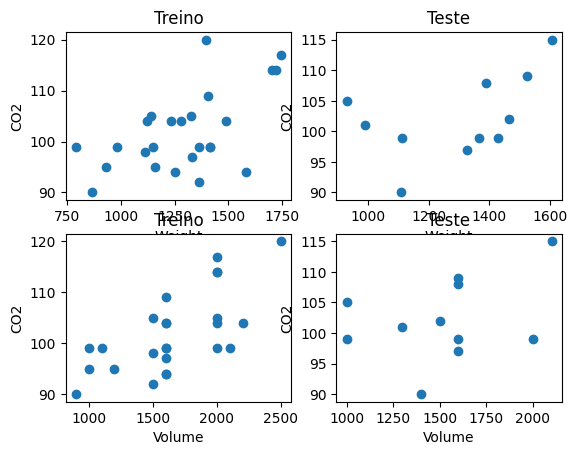

In [474]:
#
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
# Parâmetros:
    # *arrays (sequência de indexáveis com o mesmo tamanho/shape[0]): inputs permitidos são listas, arrays numpy, matrizes esparsas do scipy ou dataframes do pandas
    # test_size (float ou in, default=None): se for um floar, deve estar entre 0.0 e 1.0 e representa a proporção do dataset a ser incluído na divisão de teste. Se for um int, representa o número absoluto de amostrar para teste. Se None, o valor é determinado para completar o tamanho do treino. Se o train_size também é None, será determinado em 0.25.
    # train_size (float ou in, default=None): se for um floar, deve estar entre 0.0 e 1.0 e representa a proporção do dataset a ser incluído na divisão de treino. Se for um int, representa o número absoluto de amostrar para treino. Se None, o valor é determinado para completar o tamanho do teste.
    # random_state (int, instância numpy.random.RandomState ou None, default=None): Controla o embaralhamento aplicado aos dados antes de aplicar a divisão. Passe um int para outputs reproduzíveis através de múltiplas chamadas de função.
    # shuffle (booleano, default=True): Se deve ou não embaralhar os dados antes de dividir. Se False, stratify deve ser None.
    # stratify (array-like, default=None): Se não for None, os dados são divididos em uma maneira estratificada, usando isso como rótulos de classe
# Retornos:
    # splitting (list , length = 2 * len(arrays)): Lista contendo a divisão treino-teste dos inputs. Novo na versão 0.16: se o input é esparso, o output será scipy.sparse.csr_matrix. Caso contrário, o tipo do output é o mesmo tipo do input.


    

print(len(X_train), len(X_test), len(Y_train), len(Y_test))

plt.subplot(2,2,1)
plt.scatter(X_train[X_train.columns[0]],Y_train)
plt.xlabel('Weight')
plt.ylabel('CO2')
plt.title('Treino')

plt.subplot(2,2,2)
plt.scatter(X_test[X_test.columns[0]],Y_test)
plt.xlabel('Weight')
plt.ylabel('CO2')
plt.title('Teste')

plt.subplot(2,2,3)
plt.scatter(X_train[X_train.columns[1]],Y_train)
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.title('Treino')

plt.subplot(2,2,4)
plt.scatter(X_test[X_test.columns[1]],Y_test)
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.title('Teste')

In [475]:
# Regressão utilizando o treino

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print(regr.coef_)
print(regr.intercept_)

[0.0046924  0.01098458]
77.75464451240295


0.4725339170416347


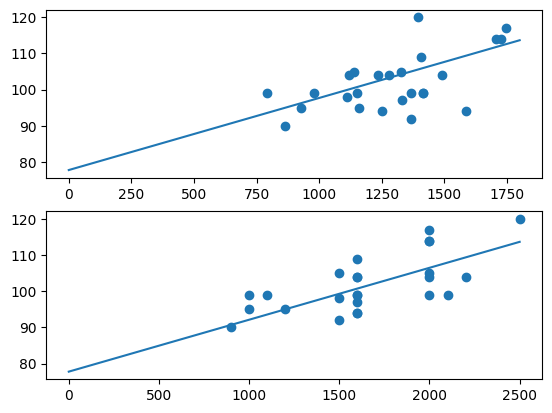

In [476]:
### VISUALIZANDO O MODELO COM O TREINO

print(r2_score(Y_train,regr.predict(X_train)))

# Dados de Y para a linha de predição

my_line_X = pandas.DataFrame({"Weight":numpy.linspace(1, 1800, 10),"Volume":numpy.linspace(1, 2500, 10)})
my_line_Y = regr.predict(my_line_X)

###     ###     ###     ###

plt.subplot(2,1,1)
plt.scatter(X_train[X_train.columns[0]],Y_train)
plt.plot(my_line_X[my_line_X.columns[0]],my_line_Y)

plt.subplot(2,1,2)
plt.scatter(X_train[X_train.columns[1]],Y_train)
plt.plot(my_line_X[my_line_X.columns[1]],my_line_Y)

In [477]:
# Gerando as predições

Y_predict = regr.predict(X_test)
print(Y_predict)

# Accuracy score:
# Verifica o quão próximo do que foi acima medido como Y_predict (a partir do X_test) está próximo do Y_test
regr.score(X_test, Y_test)

[101.73510102 102.47650041 106.42455451  98.3369302  101.10588309
  96.68007641 101.55209737  93.95717519 108.35356758 101.85241105
  93.09846577]


-0.00925985048113187

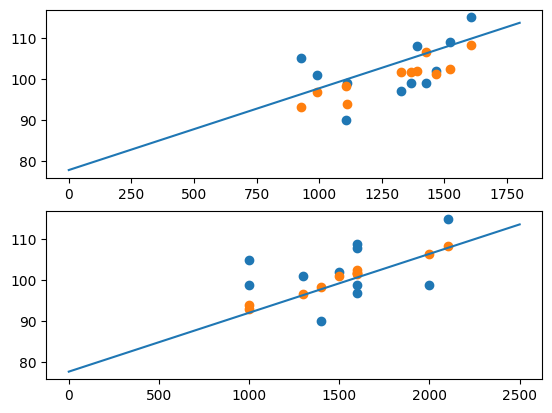

In [478]:
plt.subplot(2,1,1)
plt.scatter(X_test[X_test.columns[0]],Y_test)
plt.scatter(X_test[X_test.columns[0]],Y_predict)
plt.plot(my_line_X[my_line_X.columns[0]],my_line_Y)

plt.subplot(2,1,2)
plt.scatter(X_test[X_test.columns[1]],Y_test)
plt.scatter(X_test[X_test.columns[1]],Y_predict)
plt.plot(my_line_X[my_line_X.columns[1]],my_line_Y)

No gráfico acima:
* As linhas são a função determinada pelo modelo.
* Os pontos azuis são as observações separadas para teste.
* Os pontos alaranjados são valores de y preditivos para os valores de x de teste (Se fossem usados os valores de x de treino, estariam perfeitamente sobre a linha).  

A diferença entre os pontos azuis e alaranjados é o erro quando o modelo enfrenta uma simulação da vida real.

-0.00925985048113187


Text(0, 0.5, 'Y predito')

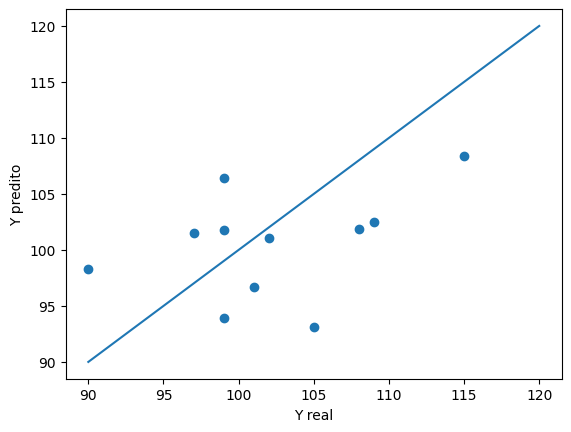

In [479]:
print(r2_score(Y_test,Y_predict))

plt.scatter(Y_test,Y_predict)
plt.plot(numpy.linspace(90, 120, 3),numpy.linspace(90, 120, 3))

plt.xlabel('Y real')
plt.ylabel('Y predito')

Um modelo mais preciso traria pontos mais próximos da linha de 45°.

## Árvore de Decisão

A partir de uma base de dados categóricos, é possível extrair um algoritmo (uma sequência de instruções) que estabelece a relação determinística de uma variável com as demais.

Diferente da regressão, a relação é estabelecida passo-a-passo, não através de uma única função.

O algoritmo também serve como ferramente de predição: tendo as informações das variáveis dependentes, a variável dependente é prevista.

*Embora tenha foco em variáveis categóricas, todas as variáveis precisam ser numéricas.*

No exemplo abaixo. o objetivo é prever o carro ('Car') a partir das variáveis Volume, Peso ('Weight') e emissão de gás carbônico ('CO2')

In [480]:
# Uso de .map() para converter variáveis

# Criando a instrução de alteração
Instructions = {}

for i in Carros['Car'].unique():
    Instructions[i] = Carros['Car'].unique().tolist().index(i)

print(Instructions)

# Serão associados a uma variável X todas as variáveis independentes e a Y a variável dependente

X = Carros[['Volume','Weight','CO2']]
Y = Carros['Car'].map(Instructions) #Aqui as variáveis são alteradas de categóricas para numéricas.

{'Toyoty': 0, 'Mitsubishi': 1, 'Skoda': 2, 'Fiat': 3, 'Mini': 4, 'VW': 5, 'Mercedes': 6, 'Ford': 7, 'Audi': 8, 'Hyundai': 9, 'Suzuki': 10, 'Honda': 11, 'Hundai': 12, 'Opel': 13, 'BMW': 14, 'Mazda': 15, 'Volvo': 16}


[Text(0.6041666666666666, 0.9545454545454546, 'Volume <= 2050.0\ngini = 0.914\nsamples = 36\nvalue = [1, 1, 4, 1, 1, 1, 5, 5, 3, 1, 1, 1, 1, 3\n3, 1, 3]\nclass = y[6]'),
 Text(0.4583333333333333, 0.8636363636363636, 'Weight <= 1329.0\ngini = 0.912\nsamples = 32\nvalue = [1, 1, 4, 1, 1, 1, 2, 5, 3, 1, 1, 1, 1, 3\n3, 0, 3]\nclass = y[7]'),
 Text(0.26666666666666666, 0.7727272727272727, 'Weight <= 1110.5\ngini = 0.879\nsamples = 17\nvalue = [1, 1, 3, 1, 1, 1, 0, 4, 1, 1, 1, 1, 1, 0\n0, 0, 0]\nclass = y[7]'),
 Text(0.13333333333333333, 0.6818181818181818, 'CO2 <= 97.0\ngini = 0.816\nsamples = 7\nvalue = [1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0\n0, 0, 0]\nclass = y[2]'),
 Text(0.06666666666666667, 0.5909090909090909, 'Volume <= 950.0\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]\nclass = y[2]'),
 Text(0.03333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]\nclass = y[3]'),
 Text(0.1, 0.5, 'gin

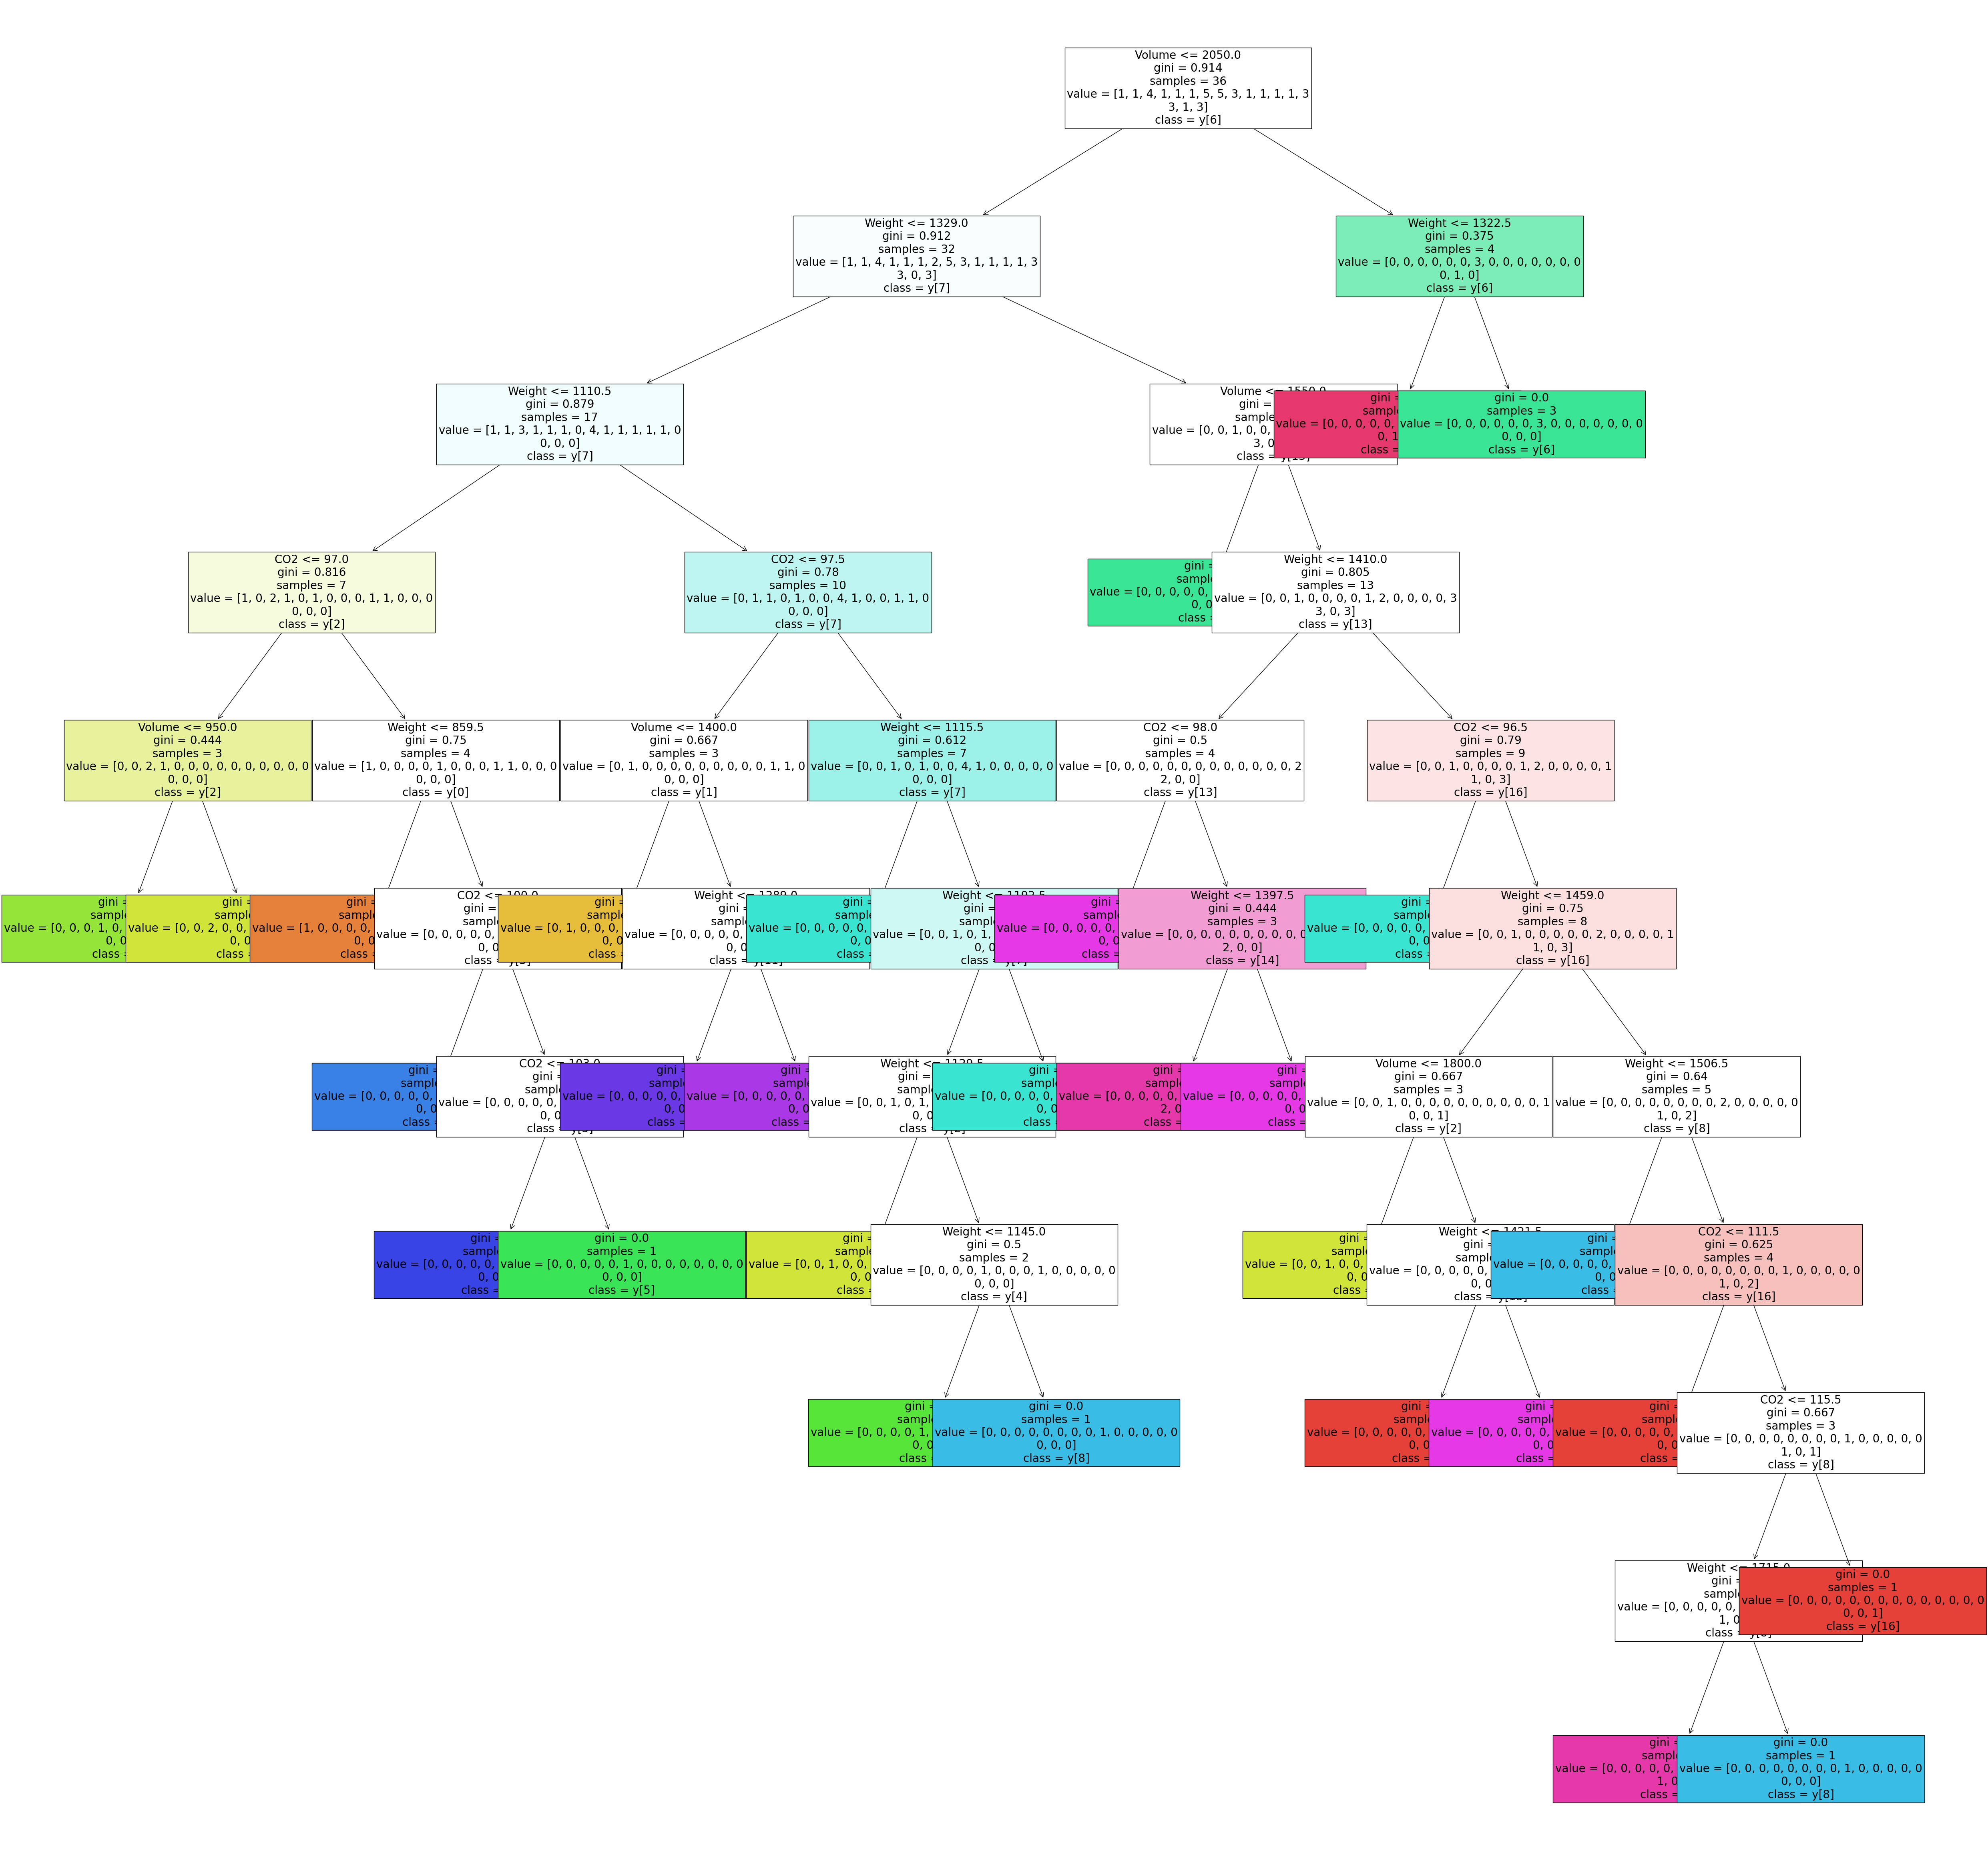

In [481]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


# criação e ajuste do modelo
DTree = DecisionTreeClassifier()
DTree = DTree.fit(X,Y)

plt.figure(figsize=(60,60))
tree.plot_tree(DTree, feature_names=['Volume','Weight','CO2'], filled = True, class_names = True, impurity = True, fontsize = 20) #Gera o diagrama.

Resultados Explicados:
* O primeiro valor a aparecer em cada nó (cada retângulo) representa uma variável abordada ali. O valor igualado à variável representa a faixa de divisão: se o valor condiz com o algoritmo, a rota a seguir é a da direita; caso contrário, a da esquerda.
* GINI - que compõe o cálculo de enropia - diz o quanto os dados são tendenciosos na amostra analisada. Varia de 0.0 (quando todas as observações que passaram por aquele nó tenderam a uma mesma rota) a 0.5 (quando a amostra foi dividida exatamente pela metade). Gini = 1 - (x/n)2 + (y/n)2
* samples (amostra) diz quantas observações restam no nó.
* value (valor) significa quantas observações, a partir dali, resultaram em cada uma das possibilidades existentes na variável resposta.

In [482]:
# Predição

print(DTree.predict([[1600, 1415, 120]]))

# 16: Volvo

[2]


C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Matriz Confusão

Havendo uma matriz de variáveis sendo a variável dependente de valores lógicos, após um teste estatístico (comumente uma regressão logística), é possível "prever" os valores com as mesmas variáveis independentes e comparar com os valores observados. A matriz confusão é uma matriz 2x2 que conflita resultados binários previstos e observados, mostrando quantas observações foram previstas corretamente (previsto e observado False, ou previsto e observado True) e quantos erraram (previsto False e observado True, ou vice-versa). 

_Para o exemplo a seguir, será criada uma amostra aleatória apenas de resultados. Variáveis independentes não fazem parte da matriz confusão, apenas a dependente e a previsão._

In [483]:
observações = numpy.random.binomial(1, 0.9, size = 1000)
predições = numpy.random.binomial(1, 0.9, size = 1000)

print(observações, predições)

[1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 

In [484]:
from sklearn import metrics

matriz_confusão = metrics.confusion_matrix(observações, predições) # Para obter o gráfico a seguir, a ordem importa.

print(matriz_confusão)

[[  9  80]
 [ 93 818]]


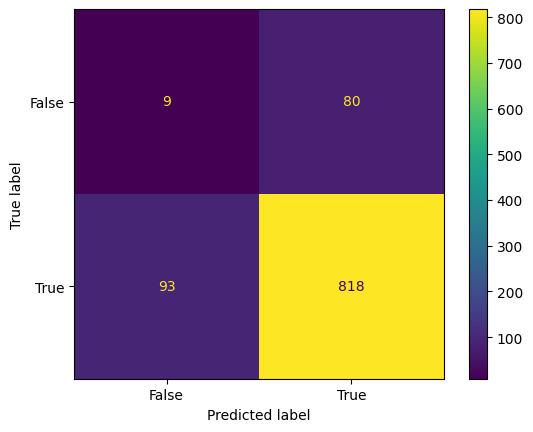

In [485]:
# Para tornar a visualização mais interpretável:

mc_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_confusão, display_labels = [False, True])

mc_display.plot()

No exemplo acima, 810 observações (verdadeiros positivos e verdadeiros negativos) foram previstas com sucesso, o restante (falsos positivos e falsos negativos) foram erros.  

Deste resultado extrai-se outras medidas:

**Acurácia** é o percentual de acertos em meio a toda a amostra.  

(Verdadeiro Positiv0 + Verdadeiro Negativo) / Predições Totais

In [486]:
# Acurácia:

Acurácia = metrics.accuracy_score(observações, predições)

print(Acurácia)

0.827


**Precisão** é o percentual de positivos que são verdadeiros.  

Verdadeiro Positivo / (Verdadeiro Positivo + Falso Positivo)

In [487]:
Precisão = metrics.precision_score(observações, predições)

print(Precisão)

0.910913140311804


**Sensibilidade (ou Revogação/Recall)** mostra o percentual de positivos que foram de fato previstos como positivos. Isso significa que ele analisa verdadeiros positivos e falsos negativos (que são positivos que foram incorretamente previstos como negativos). A sensibilidade é boa para entender o quão bem o modelo prevê que algo é positivo.

Verdadeiro Positivo / (Verdadeiro Positivo + Falso Negativo)

In [488]:
Sensibilidade_Recall = metrics.recall_score(observações, predições)

print(Sensibilidade_Recall)

0.897914379802415


**Especificidade** atua como a Sensibilidade, mas sobre as previsões de negativos.

Verdadeiro Negativo / (Verdadeiro Negativo + Falso Positivo)

In [489]:
# Como é exatamente o oposto de Recall, usamos a função recall_score, assumindo o rótulo da posição oposta:

Especificidade = metrics.recall_score(observações, predições, pos_label=0)

print(Especificidade)

0.10112359550561797


**F1-score** é a "média harmônica" de precisão e sensibilidade. Ele considera casos falsos positivos e falsos negativos e é bom para conjuntos de dados desequilibrados.

2 * ((Precisão * Sensibilidade) / (Precisão + Sensibilidade))

In [490]:
F1_score = metrics.f1_score(observações, predições)

print(F1_score)

0.9043670536207851


## Agrupamento (Clustering) hierárquico

https://scikit-learn.org/stable/modules/clustering.html

Consiste em separar observações em grupos de acordo com alguma medida de distância estabelecida. As variáveis de entrada são numéricas e o resultado será uma variável categórica dependente - não há uma variável-alvo.

*Distância*: é a métrica com a qual será calculada a semelhança entre as observações, para então ser definido o quão próxima uma observação precisa estar das demais para fazer parte do grupo.

*Ligação (linkage)*: No clustering aglomerativo, a ligação especifica como a distância entre dois clusters é calculada. Se o clustering for usado para construir uma árvore, a ligação determina a ordem em que os nós internos são criados e, portanto, a topologia da árvore. Se o clustering for usado para encontrar grupos em um determinado limite de distância, o linkage determinará onde ocorrerão os limites finais do cluster.

*O clustering em forma de dendograma será feito com o pacote SciPy.*

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [72.5, 72.5, 100.0, 100.0],
  [55.0, 55.0, 86.25, 86.25],
  [45.0, 45.0, 70.625, 70.625],
  [13.75, 13.75, 57.8125, 57.8125],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [140.0, 140.0, 163.75, 163.75],
  [120.0, 120.0, 151.875, 151.875],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [202.5, 202.5, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [312.5, 312.5, 342.5, 342.5],
  [290.0, 290.0, 327.5, 327.5],
  [270.0, 270.0,

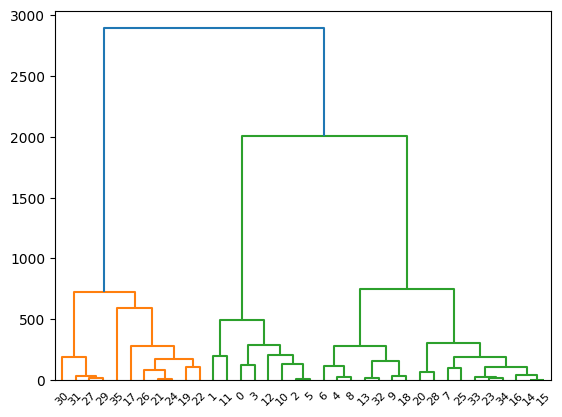

In [491]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 'X' contém três variáveis numéricas.

# method: é o método de ligação
# metric: o cálculo de distância empregado

linkage_data = linkage(X, method='ward', metric='euclidean')
dendrogram(linkage_data)

[2 2 2 2 0 2 0 0 0 0 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1]


C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


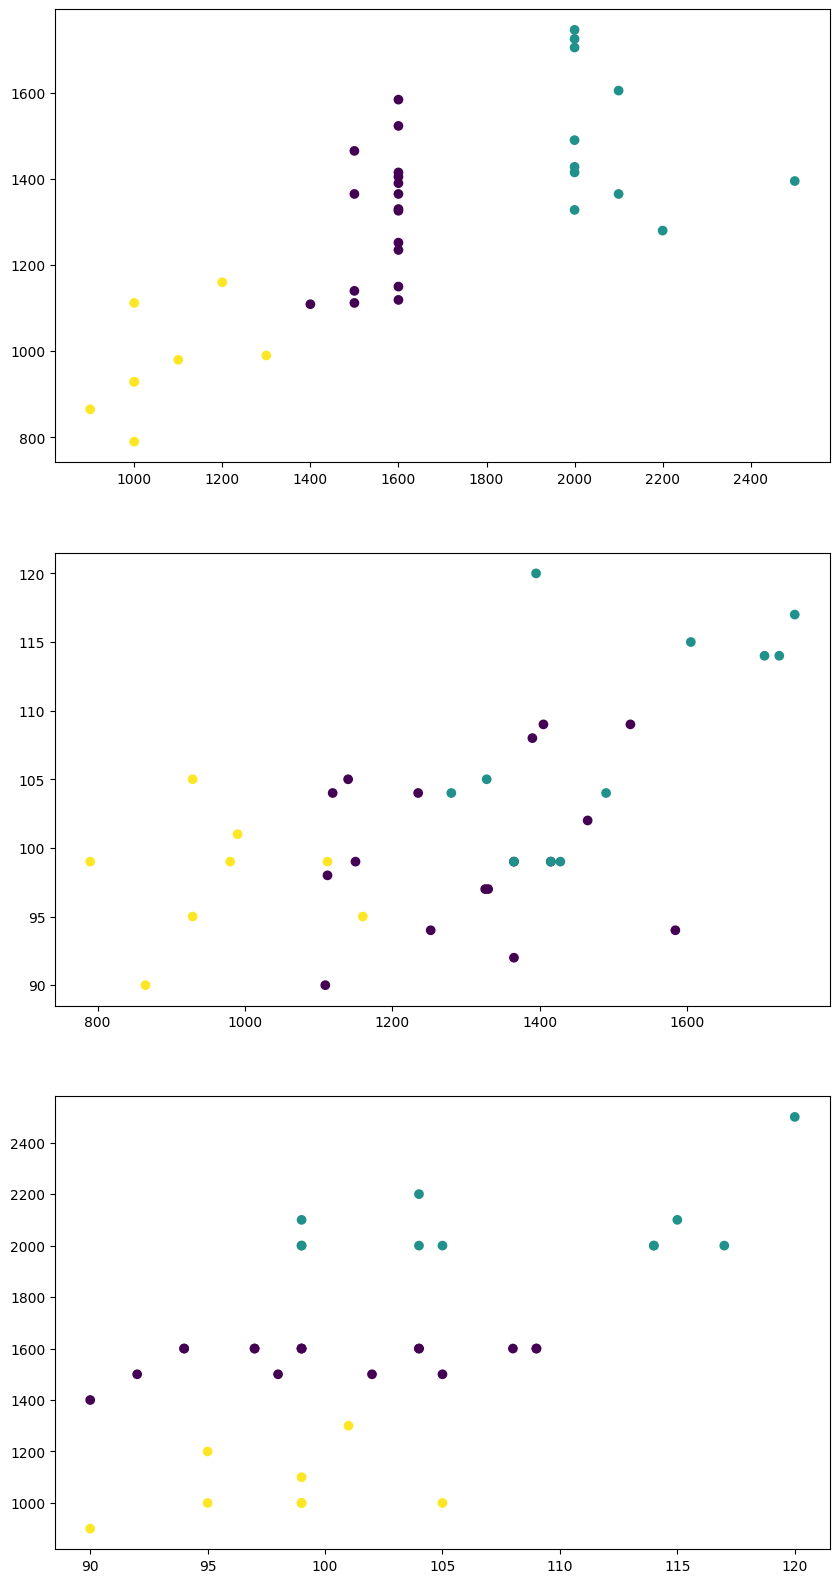

In [492]:
from sklearn.cluster import AgglomerativeClustering

# O número de grupos (clustes) é pré-determinado e entra como parâmetro na função
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(X)

print(labels)

# plots

plt.figure(figsize=(10,20))

plt.subplot(3,1,1)
plt.scatter(X[X.columns[0]], X[X.columns[1]], c=labels)

plt.subplot(3,1,2)
plt.scatter(X[X.columns[1]], X[X.columns[2]], c=labels)

plt.subplot(3,1,3)
plt.scatter(X[X.columns[2]], X[X.columns[0]], c=labels)

## Regressão Logística

A partir de variáveis independentes numéricas e uma variável dependente booleana, tem como objetivo estabelecer a relação entre as variáveis independentes e a chance de cada resultado possível na variável dependente (True ou False). Essa relação pode ser usada para prever não um resultado True ou False, mas para prever a propabilidade desse evento.  

De forma prática, é possível ajustar o nível de aceitação para Verdadeiro, Falso e Incerto de acordo com uma tolerância dada para mais ou para menos. Por exemplo: a partir do modelo, prever futuras observações como False quando a chance de ser True for menor ou igual a 0,5%; True quando a chance for maior ou igual a 99,5%, e qualquer valor entre estes dois como sendo incerto.

Regressões logísticas multinomiais aceitam variáveis categóricas com mais que 2 categorias.

In [493]:
titanicdf = pandas.read_csv("titanic.csv")
titanicdfclean = titanicdf.dropna(axis = 'index', how = 'any')

print(titanicdfclean.dtypes)

for i in titanicdfclean:
    print(i,titanicdfclean[i].unique()[:10])
    print()

print(titanicdfclean.shape)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId [904 906 916 918 920 926 936 938 940 942]

Survived [1 0]

Pclass [1 3 2]

Name ['Snyder, Mrs. John Pillsbury (Nelle Stevenson)'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Ostby, Miss. Helene Ragnhild' 'Brady, Mr. John Bertram'
 'Mock, Mr. Philipp Edmund'
 'Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)'
 'Chevre, Mr. Paul Romaine'
 'Bucknell, Mrs. William Robert (Emma Eliza Ward)'
 'Smith, Mr. Lucien Philip']

Sex ['female' 'male']

Age [23. 47. 48. 22. 41. 30. 45. 60. 24. 28.]

SibSp [1 0 3 2]

Parch [0 3 1 2 4]

Ticket ['21228' 'W.E.P. 5734' 'PC 17608' '113509' '113054' '13236' '11753'
 'PC 17594' '11813' '13695']

F

* PassengerId
  * Número do passageiro (ID)
* Survived
  * 0 = Dead 1 = Alive
* Pclass
  * 1 = First class 2 = Second class 3 = Third class
* Name
  * Name of passenger
* Sex
  * Gender
* Age
    * Age of passenger
* SibSp
    * Number of siblings
* Parch
* Ticket
* Fare
  * Tarifa
* Embarked
  * Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


In [494]:
from sklearn.linear_model import LogisticRegression

X = titanicdfclean[['Pclass', 'Age', 'SibSp']]
Y = titanicdfclean[['Survived']]

RegLog = LogisticRegression(max_iter = 10000)

**Parâmetros da regressão logística**

* *penalty* - ‘l1’, ‘l2’, ‘elasticnet’, None; default = ’l2’: Especifica a norma da penalidade. Algumas penalidades podem não funcionar com alguns solucionadores. Veja o parâmetro solver abaixo, para saber a compatibilidade entre a penalidade e o solver.
* *dual* - bool, default = False: Formulação dual ou primal. A formulação dupla é implementada apenas para penalidade l2 com solucionador liblinear. Prefira dual=False quando n_samples > n_features.
* *tol* - float, default = 1e-4: Tolerância para critérios de parada.
* *C* - float, default = 1.0: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
* *fit_intercept* - bool, default = True: Especifica se uma constante (também conhecida como viés ou interceptação) deve ser adicionada à função de decisão.
* *intercept_scaling* - float, default = 1: Útil apenas quando o solucionador 'liblinear' é usado e self.fit_intercept é definido como True. Nesse caso, x torna-se [x, self.intercept_scaling], ou seja, um recurso "sintético" com valor constante igual a intercept_scaling é anexado ao vetor de instância. A interceptação torna-se intercept_scaling * sintetic_feature_weight. Observação! o peso do recurso sintético está sujeito à regularização l1/l2 como todos os outros recursos. Para diminuir o efeito da regularização no peso do recurso sintético (e, portanto, na interceptação), o intercept_scaling deve ser aumentado.
* *class_weight* - dict or ‘balanced’, default = None: Pesos associados a classes no formato {class_label: weight}. Se não for fornecido, todas as classes devem ter peso um. O modo “balanceado” usa os valores de y para ajustar automaticamente pesos inversamente proporcionais às frequências de classe nos dados de entrada como n_samples / (n_classes * np.bincount(y)). Observe que esses pesos serão multiplicados por sample_weight (passado pelo método fit) se sample_weight for especificado.
* *random_state* - int, instância RandomState, default = None: Usado quando solver == ‘sag’, ‘saga’ ou ‘liblinear’ para embaralhar os dados. Consulte o Glossário para obter detalhes.
* *solver* - ‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’; default = ’lbfgs’: Algoritmo a utilizar no problema de optimização.
* *max_iter* - int, default = 100: Número máximo de iterações realizadas para os solucionadores convergirem.
* *multi_class* -‘auto’, ‘ovr’, ‘multinomial’; default = ’auto’: Se a opção escolhida for ‘ovr’, então um problema binário é adequado para cada rótulo. Para 'multinomial', a perda minimizada é a perda multinomial ajustada em toda a distribuição de probabilidade, mesmo quando os dados são binários. ‘multinomial’ não está disponível quando solver=’liblinear’. ‘auto’ seleciona ‘ovr’ se os dados são binários, ou se solver=’liblinear’, e caso contrário seleciona ‘multinomial’.
* *verbose* - int, default = 0: controla a quantidade de informações exibidas durante o processo de treinamento do modelo. Se o valor de "verbose" é definido como 0, isso significa que nenhum progresso será exibido. Se o valor for definido como 1, serão exibidos apenas as informações básicas sobre o progresso do treinamento. Se o valor for definido como 2, serão exibidas informações detalhadas sobre o progresso do treinamento, incluindo a taxa de aprendizado, o número de épocas e o tempo de treinamento. A opção de verbose é útil para acompanhar o progresso do treinamento, identificar problemas de convergência e determinar se o treinamento está demorando muito tempo. Além disso, ele permite ao usuário ter uma noção do andamento do processo de treinamento, que é importante para avaliar a qualidade do modelo e otimizar os hiperparâmetros do modelo, se necessário.Para os solucionadores 'liblinear' e 'lbfgs', defina *verbose* como qualquer número positivo para verbosidade.
* *warm_start* - bool, default = False: Quando definido como True, reutiliza a solução da chamada anterior para caber como inicialização, caso contrário, apenas apaga a solução anterior. Inútil para solucionador 'liblinear'.
* *n_jobs* - int, default = None: Número de núcleos de CPU usados ao paralelizar sobre classes se multi_class=’ovr’”. Este parâmetro é ignorado quando o solucionador é definido como ‘liblinear’ independentemente de ‘multi_class’ ser especificado ou não. None significa 1, a menos que esteja em um contexto joblib.parallel_backend. -1 significa usar todos os processadores.
* *l1_ratio* - float, default = None: O parâmetro de mistura Elastic-Net (alfa), com 0 <= l1_ratio <= 1. Usado apenas se penalty='elasticnet'. Definir l1_ratio=0 é equivalente a usar penalty='l2', enquanto definir l1_ratio=1 é equivalente a usar penalty='l1'. Para 0 < l1_ratio <1, a penalidade é uma combinação de L1 e L2.

**Penalidade** 

As penalidades na Regressão Logística são usadas para evitar o overfitting dos dados e para selecionar automaticamente as variáveis relevantes para a previsão.  

* Regularização L1 (também conhecida como Lasso): adiciona uma penalidade absoluta aos coeficientes da regressão, o que resulta em alguns coeficientes sendo exatamente iguais a zero e outros sendo pequenos. Isso seleciona automaticamente as variáveis relevantes e remove as irrelevantes.  
* Regularização L2 (também conhecida como Ridge): adiciona uma penalidade quadrática aos coeficientes da regressão, o que resulta em todos os coeficientes sendo pequenos, mas não necessariamente exatamente iguais a zero.  
* ElasticNet: adiciona uma penalidade linear aos coeficientes da regressão que é a soma ponderada da Regularização L1 e da Regularização L2. Isso permite que a Regularização ElasticNet selecione automaticamente as variáveis relevantes e evite o overfitting dos dados ao mesmo tempo.  

A escolha da penalidade a ser usada depende da situação específica e da preferência do usuário. Em geral, a Regularização L1 é preferida quando há muitas variáveis e você deseja selecionar automaticamente as variáveis relevantes, enquanto a Regularização L2 é preferida quando há poucas variáveis ou quando você deseja evitar o overfitting dos dados.

**Formulaçao**  

A formulção Primal representa o modelo como uma função de perda que é otimizada em relação aos coeficientes dos modelos. Neste caso, o objetivo é encontrar os coeficientes que minimizam a função de perda.  

A formulación Dual, por outro lado, representa o modelo como uma função de perda que é otimizada em relação aos dados de treinamento. Neste caso, o objetivo é encontrar os dados que minimizam a função de perda.  

Ambas as formulações produzem resultados equivalentes, mas a formulação Dual pode ser mais eficiente computacionalmente para grandes conjuntos de dados. No entanto, a formulação Primal é mais intuitiva e fácil de compreender para a maioria dos usuários, por isso é a forma mais comumente usada.

**C**

É o inverso do parâmetro de regularização. É usado para controlar a força da regularização na otimização da função de perda.

Quanto menor o valor de C, maior é a força da regularização, o que significa que os coeficientes do modelo serão mais restritos e provavelmente terão menor magnitude. Isso pode levar a um modelo menos complexo e menos propenso a overfitting, mas também pode resultar em uma perda de precisão.

Por outro lado, quanto maior o valor de C, menor é a força da regularização, o que significa que os coeficientes do modelo terão maior magnitude e serão menos restritos. Isso pode levar a um modelo mais preciso, mas também pode resultar em overfitting dos dados.

O parâmetro C é geralmente ajustado por meio de técnicas de validação cruzada para encontrar o melhor equilíbrio entre complexidade e precisão do modelo.

**Solucionadores**

Para pequenos conjuntos de dados, 'liblinear' é uma boa escolha, enquanto 'sag' e 'saga' são mais rápidos para dados extensos;

Para problemas multiclasse, apenas 'newton-cg', 'sag', 'saga' e 'lbfgs' lidam com perdas multinomiais;

'liblinear' é limitado a esquemas de um-contra-todos.

'newton-cholesky' é uma boa escolha para n_samples >> n_features, especialmente com recursos categóricos codificados one-hot com categorias raras. Observe que ele é limitado à classificação binária e à redução de um-contra-todos para classificação multiclasse. Esteja ciente de que o uso de memória deste solucionador tem uma dependência quadrática em n_features porque ele calcula explicitamente a matriz Hessiana.

Atenção A escolha do algoritmo depende da penalidade escolhida. Penalidades suportadas pelo solucionador:
* ‘lbfgs’ - [‘l2’, None]
* ‘liblinear’ - [‘l1’, ‘l2’]
* ‘newton-cg’ - [‘l2’, None]
* ‘newton-cholesky’ - [‘l2’, None]
* ‘sag’ - [‘l2’, None]
* ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

In [495]:
# Na célula de código acima, o modelo foi criado com seus parâmetros
# Aqui, o modelo será ajustado à nossa amostra;

RegLog.fit(X,Y)

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [496]:
# Prevendo o resultado a partir do percentual
# Se Probabilidade > 50%, então Predição = 1; caso contrário, Predição = 0

Predict = RegLog.predict(numpy.array([3,35,1]).reshape(1, -1))

print(Predict)

[0]


C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Score**

É uma medida da capacidade do modelo de prever corretamente as classificações dos dados de treinamento.

A pontuação (score) de confiança para uma amostra é proporcional à distância sinalizada das amostras fornecidas ao hiperplano que separa as classes. A distância é calculada com base na equação do hiperplano e nas coordenadas do ponto.

No caso binário, pontuação de confiança para self.classes_[1] onde >0 significa que esta classe seria prevista.

Pontuações de confiança por combinação (n_samples, n_classes). No caso binário, pontuação de confiança para self.classes_[1] onde >0 significa que esta classe seria prevista.

In [497]:
# Preveja pontuações de confiança para amostras.


RegLog.decision_function(X)

# Saída: Pontuações de confiança por combinação (n_samples, n_classes).

array([ 0.23748963,  0.24030983,  0.24042734, -0.24807071, -0.24583806,
        0.23831219,  0.24007482, -0.24536802, -0.2436054 ,  0.23760714,
        1.20896285, -0.52181639, -0.2464256 ,  0.72175739, -0.24701314,
        0.24183744, -0.24730691, -0.24654311, -0.24683688,  0.72669274,
        0.24266   ,  0.23795967,  0.24371757,  0.2398398 , -0.38553109,
       -0.2464256 ,  0.24218997, -0.03919375, -0.2464256 ,  0.23889973,
       -0.24442796,  0.24195495, -0.24795321, -0.24724816, -0.24572055,
       -0.2450155 ,  0.24113239, -0.3834747 , -0.24313536,  0.23913475,
        0.23690209,  0.23795967, -0.24995085,  0.24030983, -0.24677812,
       -0.24572055,  0.24066236, -0.38511981,  0.23936977,  0.24230747,
        0.24042734,  0.24007482,  0.23960478,  0.23795967, -0.24525051,
        0.23784216,  0.23760714,  0.24101488,  0.24230747,  0.23831219,
        0.2412499 , -0.24419294,  0.24148492, -0.52181639, -0.38464978,
        0.58459078, -0.24607307, -0.24713065, -0.24384041, -0.24

In [498]:
RegLog.score(X,Y)

0.5517241379310345

In [499]:
# Os coeficientes que relacionam as variáveis independentes à dependente e o intercepto.

# Coeficientes que compõem o logarimo neperiano das chances.
print('Coeficientes:', RegLog.coef_)
#.coef_ é de shape(1, n_features) quando o problema dado é binário. Em particular, quando multi_class='multinomial', .coef_ corresponde ao resultado 1 (True) e -coef_ corresponde ao resultado 0 (False).

# Intercepto que compõem o logarimo neperiano das chances.
print('Intercepto:', RegLog.intercept_)

# Lista de rótulos de classe conhecidos pelo classificador.
print('Classes:', RegLog.classes_)

# Número de características vistas durante o ajuste (.fit).
print('Características durante o ajuste:', RegLog.n_features_in_)

# Nomes de recursos vistos durante o ajuste. Definido apenas quando X possui nomes de recursos que são todos strings.
print('Recursos do ajuste:', RegLog.feature_names_in_)

# Número real de iterações para todas as classes.
# Se for binário ou multinomial, retorna apenas 1 elemento. Para o solucionador 'liblinear', apenas o número máximo de iteração em todas as classes é fornecido.
print('N de interações:', RegLog.n_iter_)



Coeficientes: [[-1.37049100e-01  1.17508357e-04  4.85442838e-01]]
Intercepto: [-0.1136068]
Classes: [0 1]
Características durante o ajuste: 3
Recursos do ajuste: ['Pclass' 'Age' 'SibSp']
N de interações: [28]


Para obter a chance (odd) e a probabilidade de determinada observação apresentar a variável resposta como True é preciso utilizar a função linear, que será determinada como o logaritmo da odd:  

Log_Chance = -1,37.X0 + 1,17.X1 + 4,85.X2 + 0,11

Chances = e^(Log_Chance) = e^(-1,37.X0 + 1,17.X1 + 4,85.X2 + 0,11)

Probabilidade = Chance / (1 + Chance)

In [500]:
obs = numpy.array([3,35,1])

Log_Odds = (RegLog.coef_[0]*obs).sum() + RegLog.intercept_
Odds = numpy.exp(Log_Odds)
Probabilidade = Odds / (1 + Odds)

print(Probabilidade*100,'%')



[49.12012915] %


In [501]:
# Score de previsão da nova observação

RegLog.decision_function([[3,35,1]])

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([-0.03519847])

In [502]:
Log_Odds = numpy.dot(X,RegLog.coef_[0]) + RegLog.intercept_
Odds = numpy.exp(Log_Odds)
Probabilidade = Odds / (1 + Odds)
YCompare = pandas.DataFrame({'Y Prob':Probabilidade,'Y Observed':Y['Survived'].values})

YCompare['Y Predict'] = YCompare['Y Prob']

YCompare.loc[YCompare['Y Prob'] < 0.41 , 'Y Predict'] = 0
YCompare.loc[YCompare['Y Prob'] > 0.59 , 'Y Predict'] = 1
YCompare.loc[(YCompare['Y Prob'] !=  1) & (YCompare['Y Prob'] !=  0) , 'Y Predict'] = 0.5


print(YCompare)

      Y Prob  Y Observed  Y Predict
0   0.559095           1        0.5
1   0.559790           1        0.5
2   0.559819           1        0.5
3   0.438298           1        0.5
4   0.438848           0        0.5
..       ...         ...        ...
82  0.559674           0        0.5
83  0.404836           0        0.5
84  0.559877           0        0.5
85  0.559500           1        0.5
86  0.438790           1        0.5

[87 rows x 3 columns]


In [503]:
Log_Odds = numpy.dot(X,RegLog.coef_[0]) + RegLog.intercept_
Odds = numpy.exp(Log_Odds)
Probabilidade = Odds / (1 + Odds)
YCompare = pandas.DataFrame({'Y Prob':Probabilidade,'Y Observed':Y['Survived'].values})

YCompare['Y Predict'] = YCompare['Y Prob']

YCompare.loc[YCompare['Y Prob'] < 0.41 , 'Y Prob'] = 0
YCompare.loc[YCompare['Y Prob'] > 0.59 , 'Y Prob'] = 1
YCompare.loc[(YCompare['Y Prob'] !=  1) & (YCompare['Y Prob'] !=  0) , 'Y Prob'] = 0.5


print(YCompare)

    Y Prob  Y Observed  Y Predict
0      0.5           1   0.559095
1      0.5           1   0.559790
2      0.5           1   0.559819
3      0.5           1   0.438298
4      0.5           0   0.438848
..     ...         ...        ...
82     0.5           0   0.559674
83     0.0           0   0.404836
84     0.5           0   0.559877
85     0.5           1   0.559500
86     0.5           1   0.438790

[87 rows x 3 columns]


## Grid Search

Grid Search é um método de otimização de hiperparâmetros para modelos de aprendizado de máquina. Ele consiste em testar uma combinação de valores diferentes de hiperparâmetros para encontrar a melhor combinação que maximiza a pontuação do modelo em questão, como a precisão ou o F1-Score. Para isso, o Grid Search testa cada combinação de hiperparâmetros em uma grade pré-definida, treina o modelo com esses hiperparâmetros e avalia o desempenho. A combinação de hiperparâmetros que obtém o melhor desempenho é selecionada como a melhor opção.

Hiperparâmetros são parâmetros que não são aprendidos automaticamente durante o processo de treinamento de um modelo de aprendizado de máquina. Eles são definidos manualmente antes do treinamento e afetam a forma como o modelo se comporta e aprende a partir dos dados. Alguns exemplos de hiperparâmetros incluem a taxa de aprendizado, o número de árvores em uma floresta aleatória, o número de vizinhos em um modelo k-NN e a profundidade máxima em uma árvore de decisão. Ajustar esses hiperparâmetros pode ter um grande impacto na precisão do modelo, por isso a otimização de hiperparâmetros é uma etapa importante do processo de desenvolvimento de modelos.

In [504]:
# No exemplo abaixo, tentamos treinar um modelo com valores variáveis para C na regressão logística. Havíamos configurado max_iter para um valor mais alto para garantir que o modelo encontre um resultado.

    # Lembre-se de que o valor padrão para C em um modelo de regressão logística é 1. Compararemos isso mais tarde de acordo com o score do modelo.

Old_Score = RegLog.score(X,Y)

print(Old_Score)

0.5517241379310345


Seguiremos os mesmos passos de antes, exceto que desta vez definiremos um intervalo de valores para C.

Saber quais valores definir para os parâmetros pesquisados exigirá uma combinação de conhecimento de domínio e prática.

In [505]:
#Como o valor padrão para C é 1, definiremos um intervalo de valores em torno dele.

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:                        # Para cada item na lista C
  RegLog.set_params(C=choice, verbose = 0)           # Altere o parâmetro 'C' para o item altujal
  RegLog.fit(X, Y)                      # Recrie o modelo
  scores.append(RegLog.score(X, Y))      # Adicione a pontuação para a lista Score

print(scores.index(max(scores)))

0


C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a

### GridSearchCV

O processo consiste em criar um dicionário de hiperparâmetros a serem testados, sendo as chaves os nomes dos hiperparâmetros (str) e os valores, listas contendo os valores possíveis para cada hiperparâmetros.  

Então submeter o modelo (antes do ajuste) ao GridSearch. Se o modelo não possui, por si só, uma forma de medir seu score (ou se o score padrão não é o desejado), é possível atribuir exigível que resulte no valor preferível para servir de medida de otimização.  

Quando o modelo é ajustado, a iteração com as possibilidade de hiperparâmetros é executada.

As tentativas que resultam em erro são registradas como nan (mas isso pode ser alterado com o parâmetro )

In [506]:
from sklearn.model_selection import GridSearchCV

# Dicionário 
#Param = dict(
#    penalty=[None, 'l1', 'l2', 'elasticnet'], 
#    dual=[False, True], 
#    tol=[0.001, 0.0001, 0.00001, 0.000001], 
#    C=numpy.arange(0, 10, 0.1), 
#    solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
#    multi_class=['ovr', 'multinomial'], 
#    n_jobs=[1, -1])

Param = dict(
    penalty=[None, 'l1', 'l2', 'elasticnet'], 
    dual=[False, True], 
    solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
    multi_class=['ovr', 'multinomial']
    )

Otimiz = GridSearchCV(RegLog, Param, return_train_score = True, refit = True, verbose = 0)

OtmizRegLog = Otimiz.fit(X,Y)

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packa

In [507]:
# Resultados

print(OtmizRegLog.best_score_)

print(OtmizRegLog.best_params_)

print(OtmizRegLog.best_estimator_)

0.5607843137254902
{'dual': False, 'multi_class': 'ovr', 'penalty': None, 'solver': 'lbfgs'}
LogisticRegression(C=2, max_iter=10000, multi_class='ovr', penalty=None)


In [508]:
Ganho = OtmizRegLog.best_score_ - Old_Score

print(f'Um ganho de {Ganho} no score.')

Um ganho de 0.009060175794455727 no score.


In [509]:
# Mostrando todas as iterções que não resultaram em erro.

médias = OtmizRegLog.cv_results_['mean_test_score']

stds = OtmizRegLog.cv_results_['std_test_score']

params = OtmizRegLog.cv_results_['params']

for mean, stdev, param in zip(médias, stds, params):
    if not numpy.isnan(mean): #Para mostrar apenas os resultatos que não apresentaram erros devido a certas combinações de hiperparâmetros.
        print("%f (%f) com: %r" % (mean, stdev, param))

print()
print(OtmizRegLog.best_index_) # Índice onde é encontrado o melhor resultado

0.560784 (0.147060) com: {'dual': False, 'multi_class': 'ovr', 'penalty': None, 'solver': 'lbfgs'}
0.560784 (0.147060) com: {'dual': False, 'multi_class': 'ovr', 'penalty': None, 'solver': 'newton-cg'}
0.560784 (0.147060) com: {'dual': False, 'multi_class': 'ovr', 'penalty': None, 'solver': 'newton-cholesky'}
0.549673 (0.136136) com: {'dual': False, 'multi_class': 'ovr', 'penalty': None, 'solver': 'sag'}
0.538562 (0.132897) com: {'dual': False, 'multi_class': 'ovr', 'penalty': None, 'solver': 'saga'}
0.538562 (0.132897) com: {'dual': False, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.538562 (0.132897) com: {'dual': False, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}
0.538562 (0.132897) com: {'dual': False, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}
0.538562 (0.132897) com: {'dual': False, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.538562 (0.132897) com: {'dual': False, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': '

In [510]:
pandas.DataFrame(OtmizRegLog.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dual,param_multi_class,param_penalty,param_solver,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012192,0.002854,0.005798,0.001169,False,ovr,None,lbfgs,"{'dual': False, 'multi_class': 'ovr', 'penalty...",0.722222,...,0.560784,0.147060,1,0.521739,0.565217,0.614286,0.571429,0.542857,0.563106,0.031030
1,0.004198,0.000748,0.000000,0.000000,False,ovr,None,liblinear,"{'dual': False, 'multi_class': 'ovr', 'penalty...",NaN,...,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.009593,0.001356,0.005397,0.000490,False,ovr,None,newton-cg,"{'dual': False, 'multi_class': 'ovr', 'penalty...",0.722222,...,0.560784,0.147060,1,0.521739,0.565217,0.614286,0.571429,0.542857,0.563106,0.031030
3,0.006395,0.001958,0.005398,0.000799,False,ovr,None,newton-cholesky,"{'dual': False, 'multi_class': 'ovr', 'penalty...",0.722222,...,0.560784,0.147060,1,0.521739,0.565217,0.614286,0.571429,0.542857,0.563106,0.031030
4,0.012591,0.001496,0.004797,0.000748,False,ovr,None,sag,"{'dual': False, 'multi_class': 'ovr', 'penalty...",0.666667,...,0.549673,0.136136,6,0.521739,0.565217,0.614286,0.571429,0.528571,0.560248,0.033335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.001599,0.000490,0.000000,0.000000,True,multinomial,elasticnet,liblinear,"{'dual': True, 'multi_class': 'multinomial', '...",NaN,...,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,0.001599,0.000800,0.000000,0.000000,True,multinomial,elasticnet,newton-cg,"{'dual': True, 'multi_class': 'multinomial', '...",NaN,...,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,0.001598,0.000489,0.000000,0.000000,True,multinomial,elasticnet,newton-cholesky,"{'dual': True, 'multi_class': 'multinomial', '...",NaN,...,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,0.000800,0.000400,0.000000,0.000000,True,multinomial,elasticnet,sag,"{'dual': True, 'multi_class': 'multinomial', '...",NaN,...,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Abaixo, será realizado o Grid Search para apenas o hiperparâmetro C e apresentado de forma gráfica a relação entre o score e o hiperparâmetro.

In [511]:
Otimiz = GridSearchCV(RegLog, {'C':numpy.arange(0, 10, 0.1)}, return_train_score = True, refit = True, verbose = 0)

OtmizRegLog = Otimiz.fit(X,Y)

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a

In [512]:
OtmizRegLog.cv_results_['mean_test_score']

array([       nan, 0.45947712, 0.51633987, 0.52745098, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.53856209, 0.53856209,
       0.53856209, 0.53856209, 0.53856209, 0.5496732 , 0.5496732 ,
       0.5496732 , 0.5496732 , 0.5496732 , 0.5496732 , 0.54967

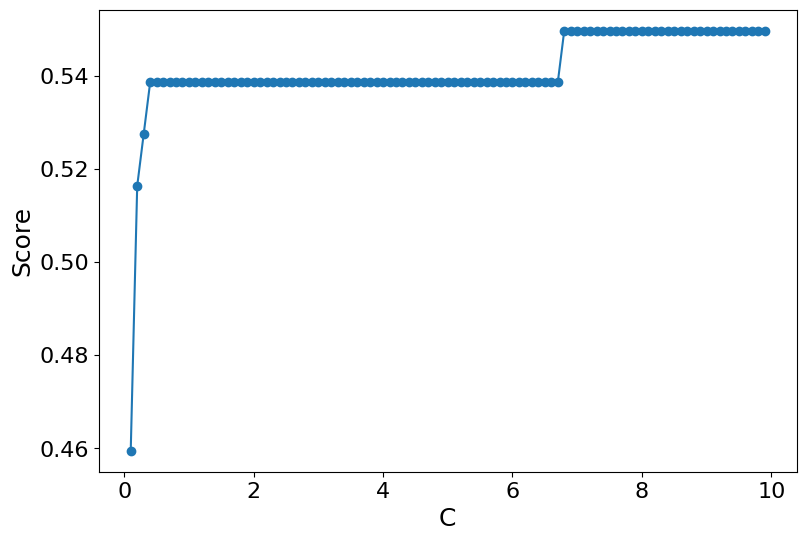

In [513]:


plt.figure(figsize=(9,6))
plt.plot(numpy.arange(0, 10, 0.1), OtmizRegLog.cv_results_['mean_test_score'], marker = 'o')

# Adjust labels and font (to make visable)
plt.xlabel("C", fontsize = 18)
plt.ylabel("Score", fontsize = 18)
plt.tick_params(labelsize = 16)

## Pré-processamento

Etapa em que se preparam os dados para serem analisados. Isso pode incluir tarefas como limpeza de dados (remoção de valores faltantes ou duplicados), transformação de variáveis (por exemplo, a codificação de variáveis categóricas - conversão em variáveis numéricas ou dummy), normalização de variáveis numéricas e seleção de variáveis relevantes. O objetivo é deixar os dados em um formato que seja adequado para a aplicação de técnicas de análise posteriormente.

### One Hot Encoding

Consiste em substituir uma variável categórica com n categorias em n variáveis binárias correspondentes. Quando a variável categórica em questão apresenta categoria A para determinada observação, a variável correspondente A apresenta valor 1 e as demais, que correspondem às demais categorias, apresentam valor 0. Uma das categorias pode ser deixada sem correspondência, sendo representada pela ocorrência de valor 0 para todas as demais.

As variáveis binárias resultantes deste processo são chamadas de variáveis dummies.

Parâmetros
* data: array-like, Series, or DataFrame  
    * Data of which to get dummy indicators.  
* prefix : str, list of str, or dict of str, default None  
    * String to append DataFrame column names. Pass a list with length equal to the number of columns when calling get_dummies on a DataFrame. Alternatively, prefix can be a dictionary mapping column names to prefixes.  
* prefix_sep : str, default '_'  
    * If appending prefix, separator/delimiter to use. Or pass a list or dictionary as with prefix.  
* dummy_na : bool, default False  
    * Add a column to indicate NaNs, if False NaNs are ignored.  
* columns : list-like, default None  
    * Column names in the DataFrame to be encoded. If columns is None then all the columns with object, string, or category dtype will be converted.  
* sparse : bool, default False  
    * Whether the dummy-encoded columns should be backed by a SparseArray (True) or a regular NumPy array (False).  
* drop_first : bool, default False  
    * Whether to get k-1 dummies out of k categorical levels by removing the first level.  
* dtype : dtype, default np.uint8

In [514]:
OHE_Titanic = pandas.get_dummies(titanicdfclean[['Embarked']], drop_first=True)

OHE_Titanic = pandas.concat([titanicdfclean,OHE_Titanic], axis = 1)

# 'Embarked_C' foi removido pelo 'drop_first
print(OHE_Titanic[['Embarked','Embarked_Q','Embarked_S' ]][:30])

    Embarked  Embarked_Q  Embarked_S
12         S           0           1
14         S           0           1
24         C           0           0
26         C           0           0
28         S           0           1
34         C           0           0
44         S           0           1
46         C           0           0
48         C           0           0
50         S           0           1
53         S           0           1
57         S           0           1
59         C           0           0
64         C           0           0
68         C           0           0
69         S           0           1
73         C           0           0
74         C           0           0
75         C           0           0
77         S           0           1
81         S           0           1
92         S           0           1
96         S           0           1
100        C           0           0
109        S           0           1
112        C           0           0
1

## K-Means

K-means é um método de aprendizado não supervisionado para agrupar pontos de dados. O algoritmo divide iterativamente os pontos de dados em K clusters, minimizando a variância em cada cluster.

Primeiro, cada ponto de dados é atribuído aleatoriamente a um dos K clusters. Em seguida, calculamos o centróide (funcionalmente o centro) de cada cluster e reatribuímos cada ponto de dados ao cluster com o centróide mais próximo. Repetimos esse processo até que as atribuições de cluster para cada ponto de dados não sejam mais alteradas.

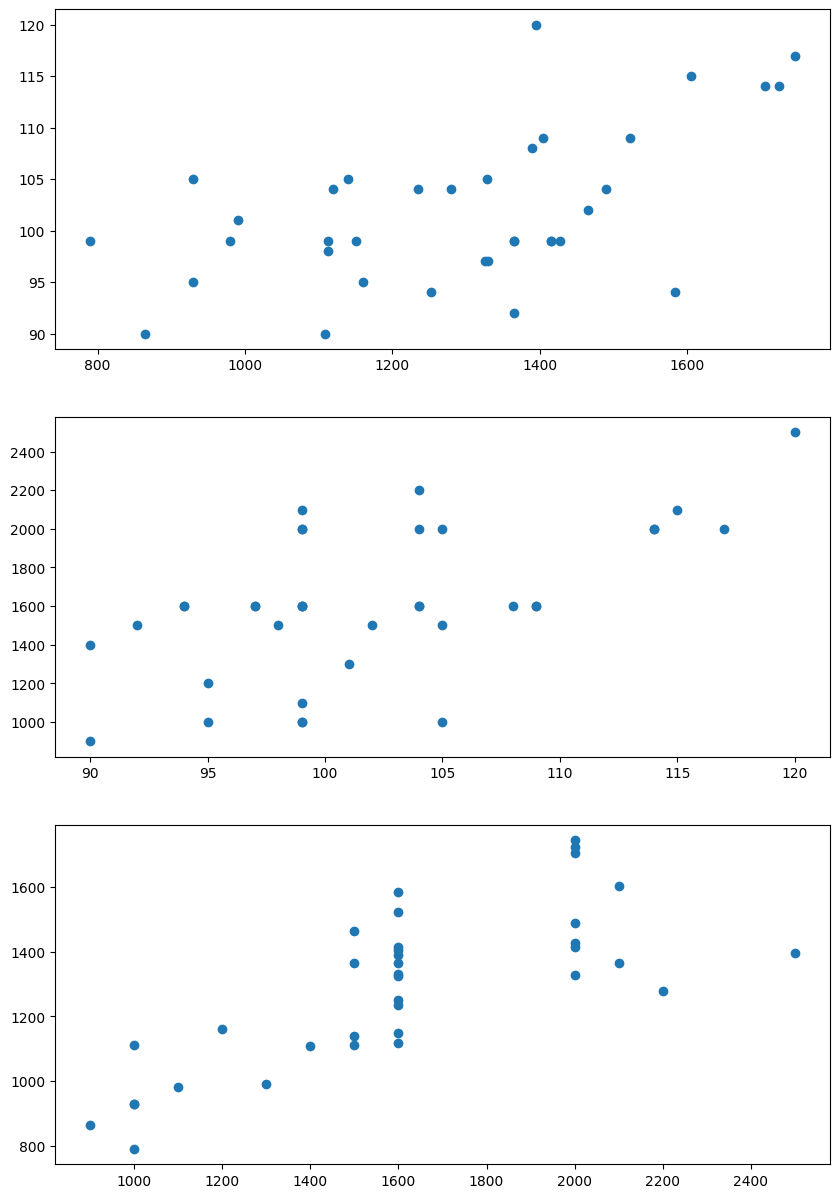

In [515]:
X = Carros[['Weight', 'Volume','CO2']]

plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.scatter(X['Weight'], X['CO2'])

plt.subplot(3,1,2)
plt.scatter(X['CO2'], X['Volume'])

plt.subplot(3,1,3)
plt.scatter(X['Volume'], X['Weight'])

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Weight')

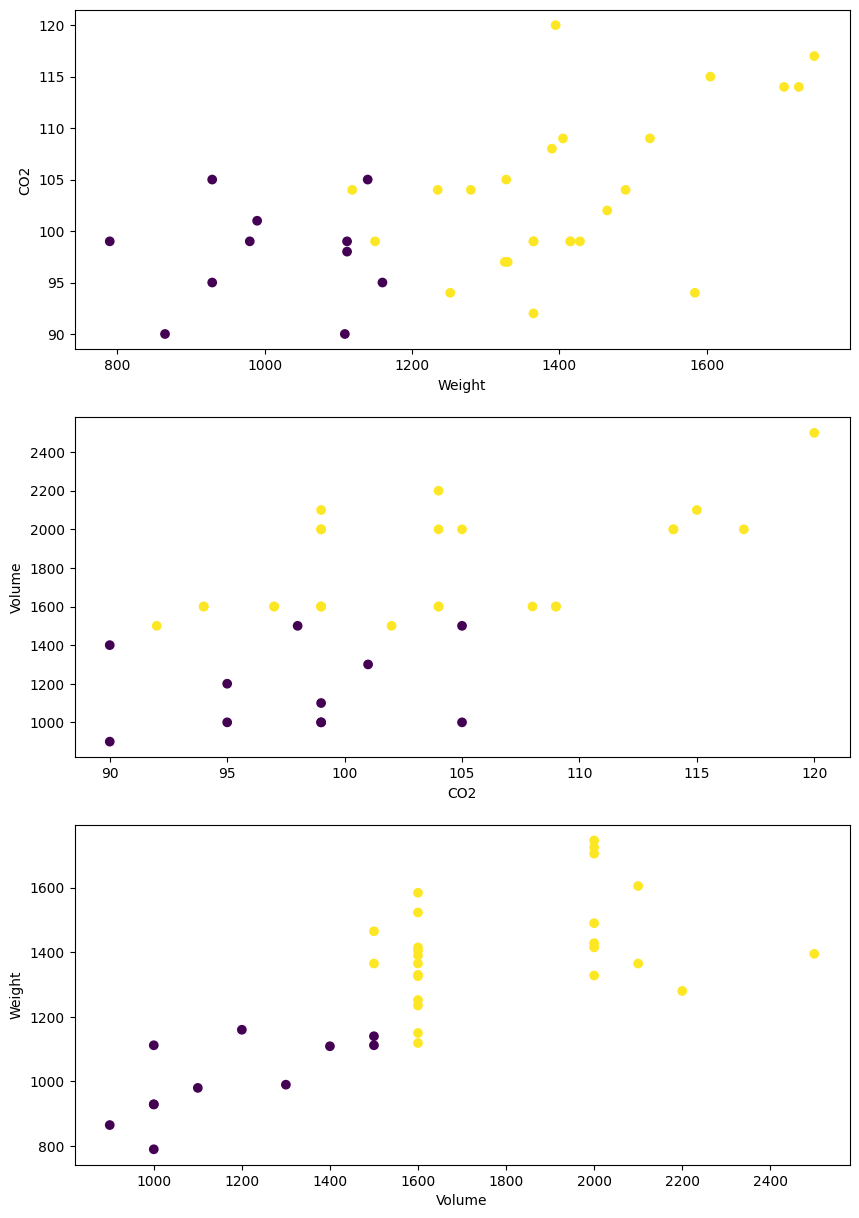

In [516]:
from sklearn.cluster import KMeans

# Estabelecendo que 2 grupos serão formados. K=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.scatter(X['Weight'], X['CO2'], c = kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('CO2')

plt.subplot(3,1,2)
plt.scatter(X['CO2'], X['Volume'], c = kmeans.labels_)
plt.xlabel('CO2')
plt.ylabel('Volume')

plt.subplot(3,1,3)
plt.scatter(X['Volume'], X['Weight'], c = kmeans.labels_)
plt.xlabel('Volume')
plt.ylabel('Weight')

A inércia é uma medida da qualidade do agrupamento dos dados. É a soma dos erros internos dos agrupamentos, calculada como a soma dos quadrados das distâncias entre os pontos de dados e seus centroides correspondentes (pontos médios dos agrupamentos). Quanto menor a inércia, melhor o agrupamento, pois indica que os pontos de dados estão mais próximos de seus centroides correspondentes.

In [517]:
kmeans.inertia_

3047651.745454545

### Método "Elbow"

O agrupamento de K-means exige que selecionemos K, o número de clusters nos quais queremos agrupar os dados. O método do cotovelo nos permite representar graficamente a inércia (uma métrica baseada na distância) e visualizar o ponto no qual ela começa a diminuir linearmente. Esse ponto é chamado de "cotovelo" (elbow) e é uma boa estimativa para o melhor valor de K com base em nossos dados.

Ao invés de escolher o valor de K de forma arbitrária, é possível avaliar o quanto o acréscimo de um grupo no agrupamento colabora para um modelo mais refinado, com um menor valor de inércia.

Logicamente, quanto mais grupos, menor a inércia, até o limite de n grupos para n observações. Isso não é um resultado gerenciável, não traria resposta alguma.

Uma forma de escolher um ponto "ótimo" entre capacidade de explicação (menos grupos) e qualidade (menor inércia) é através do "método do cotovelo"

In [518]:
print(list(range(len(X))[1:]))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly 

Text(0, 0.5, 'Inertia')

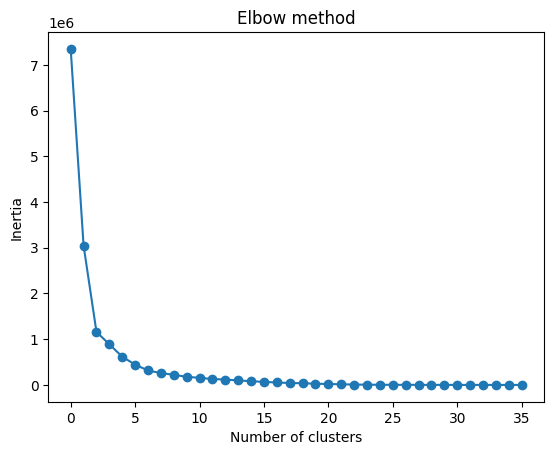

In [519]:
inertias = []

for i in range(len(X)+1)[1:]:
    kmeans = KMeans(n_clusters=i, verbose = 0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(len(X)), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Cada ponto no gráfico acima representa uma ajuste do clustering com uma quantidade diferente de grupos. O eixo Y representa a inércia: quanto mais grupos, menor a inércia.

Vemos que de 34 para 35 grupos a redução na inércia não é tão significativa quando de de 1 para 2 grupos ou de 2 para três.

O formato do gráfico assemelha-se a um cotovelo (disto o nome do método), no qual vemos um ponto de maior flexão em n-clusters = 3, a partir do qual a o aumento do número de clusters pode não ser compensado pela redução da inércia.

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Weight')

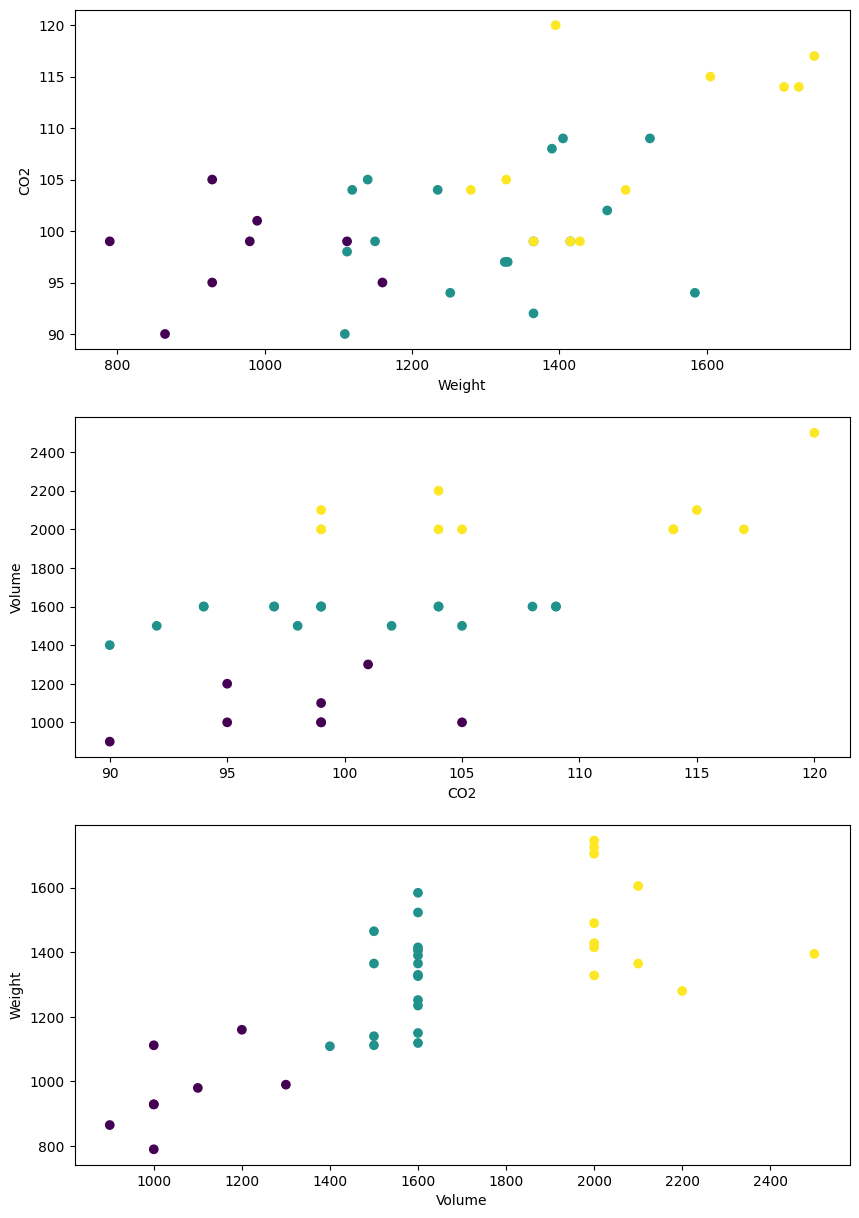

In [520]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.scatter(X['Weight'], X['CO2'], c = kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('CO2')

plt.subplot(3,1,2)
plt.scatter(X['CO2'], X['Volume'], c = kmeans.labels_)
plt.xlabel('CO2')
plt.ylabel('Volume')

plt.subplot(3,1,3)
plt.scatter(X['Volume'], X['Weight'], c = kmeans.labels_)
plt.xlabel('Volume')
plt.ylabel('Weight')

## Agregação Bootstrap (Bagging - Empacotamento)

* São criados múltiplos subconjuntos aleatórios de amostra de treinamento;
* Um modelo é treinado com cada subconjunto;
* Cada treinamento ajusta um classificador (para classificações) ou um regressor (para regressões);
* As previsões para cada subconjunto são agregadas por meio de voto majoritário para classificação ou média para regressão.

In [521]:
# Exemplo de classificação sem agregação Bootstrap

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

VinhosDF = datasets.load_wine(as_frame = True)

X = VinhosDF.data
Y = VinhosDF.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,Y_train)

Y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred = Y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


Para empacotar precisamos definir o parâmetro n_estimators, este é o número de classificadores - de treinamentos de modelo e, consequentemente, de  - base que nosso modelo vai agregar.

Para este conjunto de dados de amostra, o número de estimadores é relativamente baixo; geralmente, intervalos muito maiores são explorados. O ajuste de hiperparâmetros geralmente é feito com uma Grid Search, mas, por enquanto, usaremos um conjunto selecionado de valores para o número de estimadores.

In [522]:
# A função para Bootstrap

from sklearn.ensemble import BaggingClassifier

BggClf = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators = 4, random_state = 22, oob_score = True, verbose = 0)

BggClf.fit(X_train, Y_train)

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=4,
                  oob_score=True, random_state=22)

[Text(0.4444444444444444, 0.875, 'flavanoids <= 1.47\ngini = 0.661\nsamples = 82\nvalue = [42, 52, 39]'),
 Text(0.2222222222222222, 0.625, 'color_intensity <= 3.45\ngini = 0.093\nsamples = 24\nvalue = [0, 2, 39]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [0, 0, 39]'),
 Text(0.6666666666666666, 0.625, 'proline <= 724.5\ngini = 0.496\nsamples = 58\nvalue = [42, 50, 0]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 29\nvalue = [0, 48, 0]'),
 Text(0.7777777777777778, 0.375, 'color_intensity <= 3.46\ngini = 0.087\nsamples = 29\nvalue = [42, 2, 0]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [42, 0, 0]')]

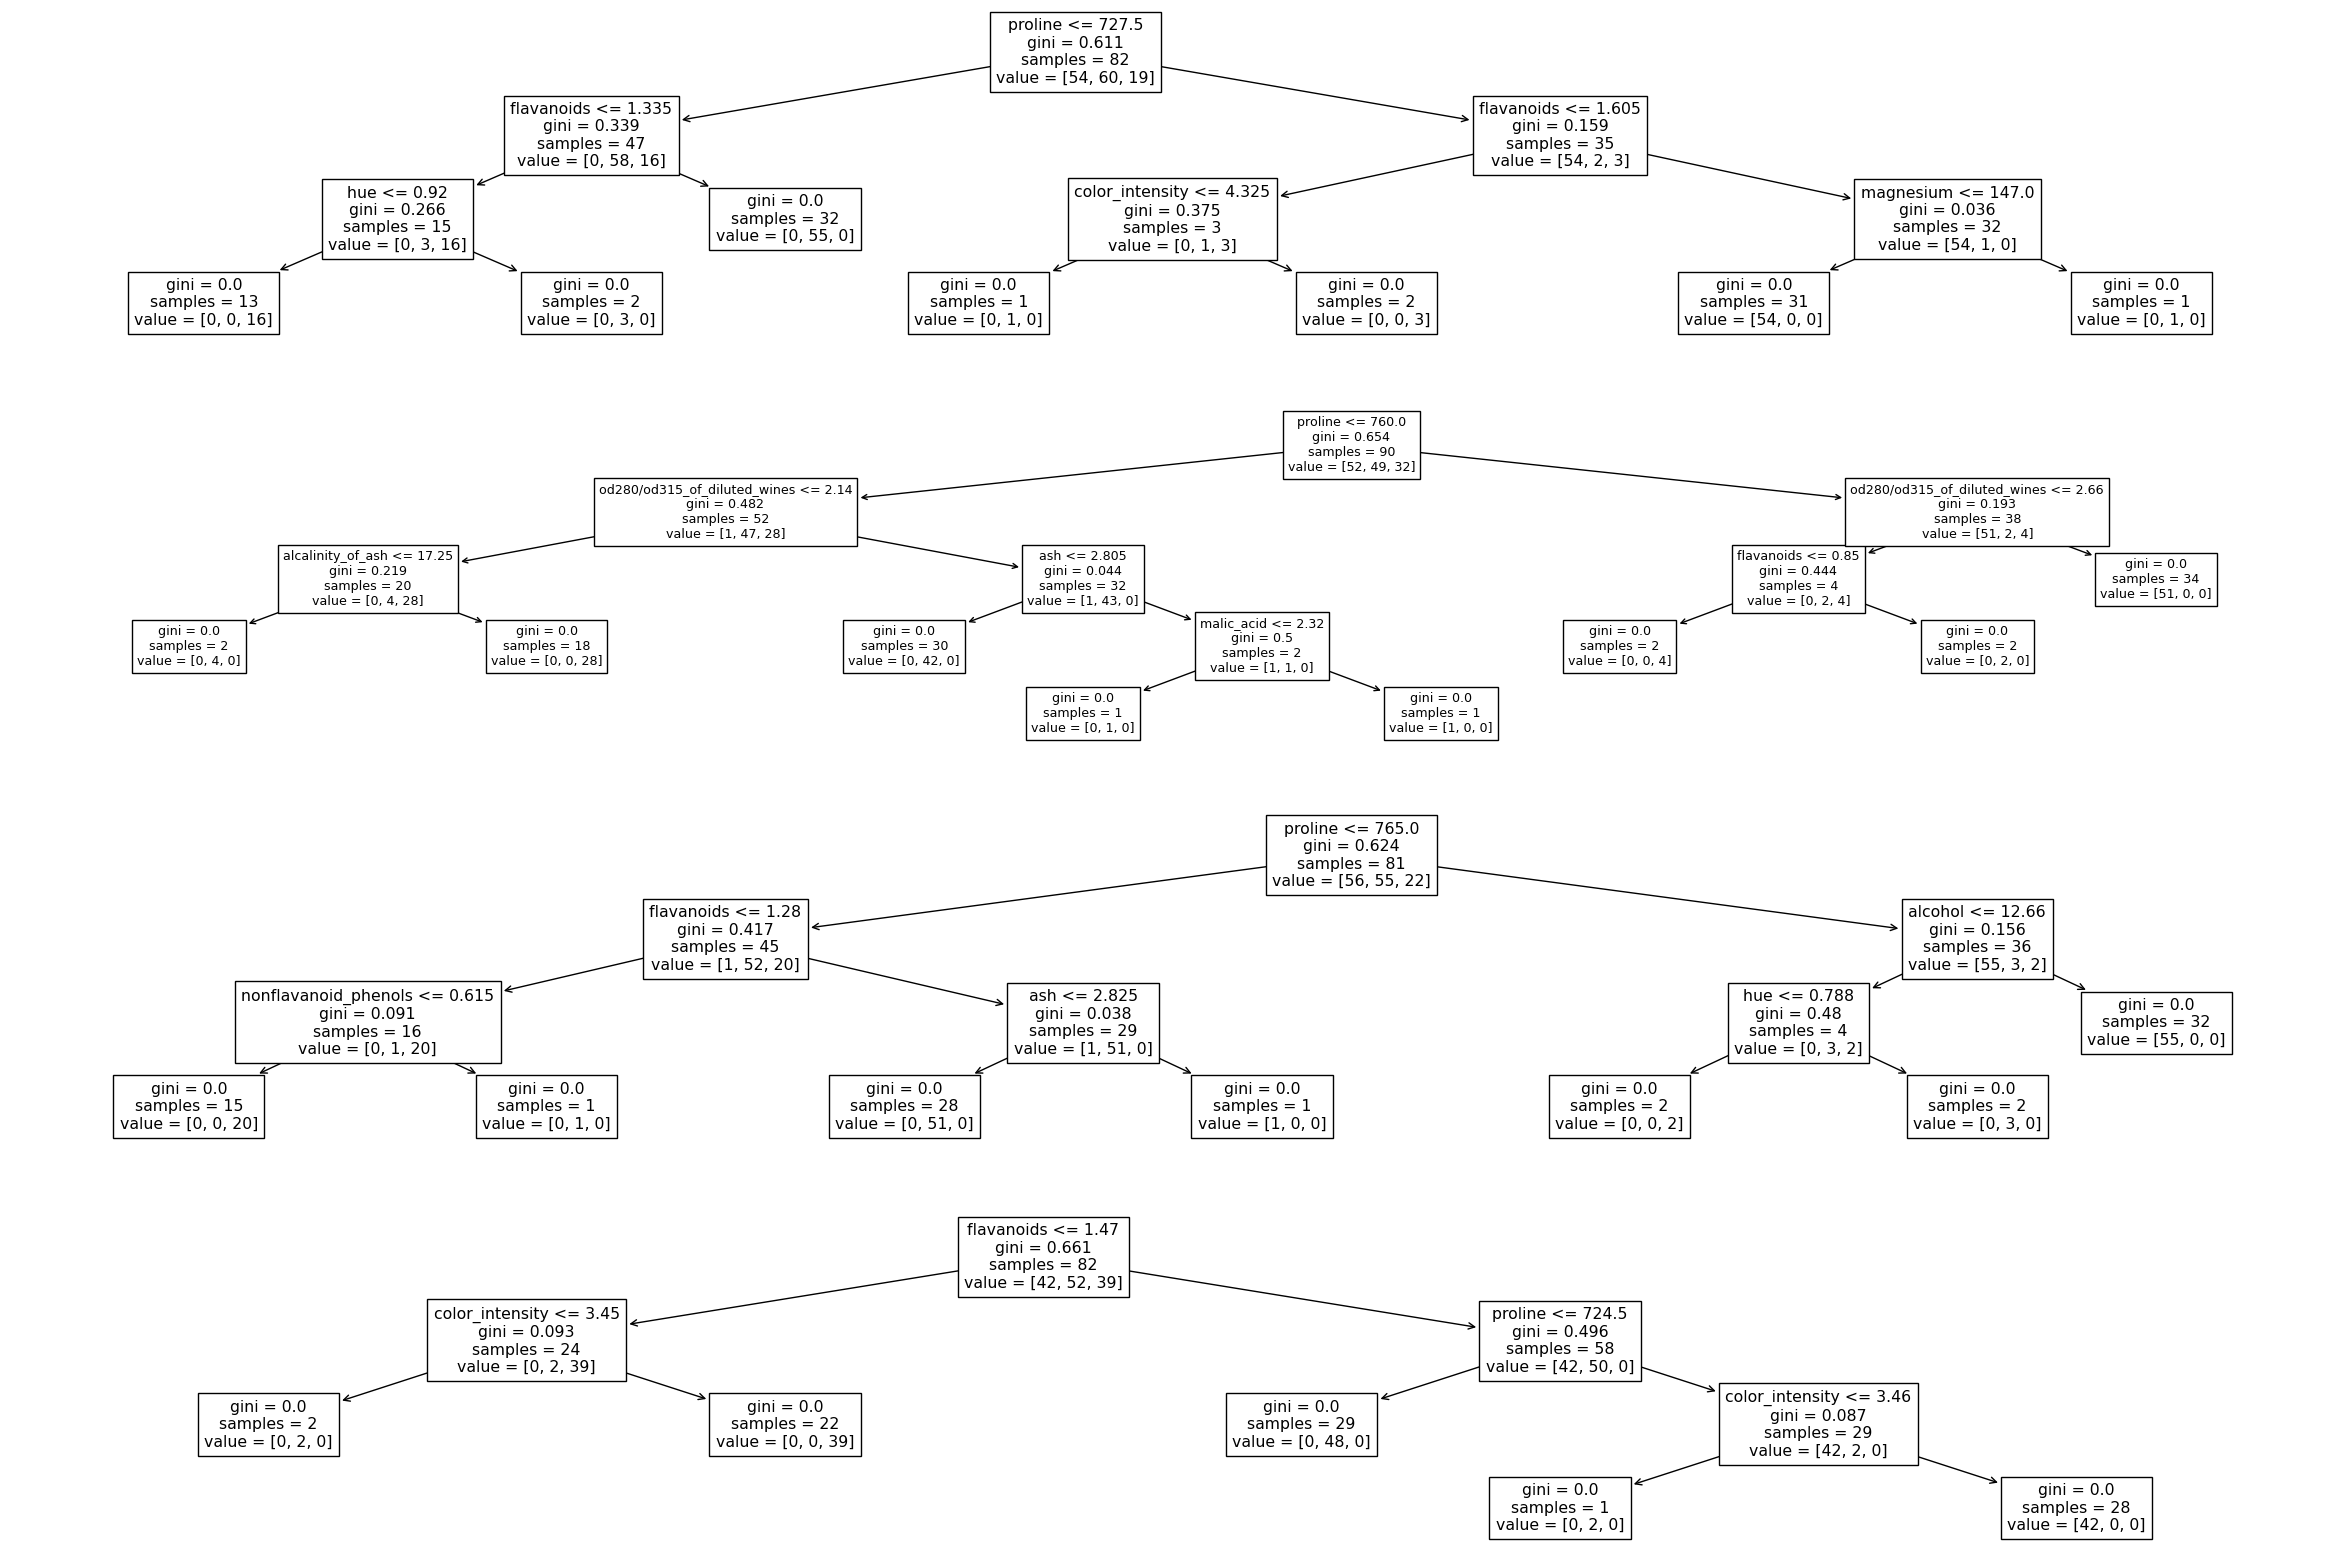

In [523]:
plt.figure(figsize=(30, 20))

plt.subplot(4,1,1)
tree.plot_tree(BggClf.estimators_[0], feature_names = X.columns)
plt.subplot(4,1,2)
tree.plot_tree(BggClf.estimators_[1], feature_names = X.columns)
plt.subplot(4,1,3)
tree.plot_tree(BggClf.estimators_[2], feature_names = X.columns)
plt.subplot(4,1,4)
tree.plot_tree(BggClf.estimators_[3], feature_names = X.columns)


In [524]:
# Estimador base para ajustar 0 subconjuntos aleatórios do conjunto de dados. Se Nenhum, então o estimador base é um

BggClf.estimator_

DecisionTreeClassifier()

In [525]:
# Número de estimadores de base no conjunto.

BggClf.base_estimator_

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeClassifier()

In [526]:
# Número de características vistas durante o ajuste.

BggClf.n_features_in_

13

In [527]:
# Nomes de recursos vistos durante o ajuste. Definido apenas quando X possui nomes de recursos que são todos strings.

BggClf.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [528]:
# Coleção de estimadores de base ajustada.

BggClf.estimators_

[DecisionTreeClassifier(random_state=1929108492),
 DecisionTreeClassifier(random_state=1564504698),
 DecisionTreeClassifier(random_state=986264995),
 DecisionTreeClassifier(random_state=406464487)]

In [529]:
# Subconjuntos de amostras extraídas para cada estimador de base

BggClf.estimators_samples_

[array([ 12,  18,  96,   4,  35,  37,  37,  70,  59,   2,  39,  34, 114,
         75,  53, 107, 120, 124,  95, 119,  52,  52,  17,  89,  30,  13,
        101, 114,  27,  28,  96,  18,   5,  65,  77,  46, 102, 122,  75,
         49,  48, 111, 127,   8,  21,  75,   9,  89,  38,  43,  48,  44,
         26,  19, 120,   1, 120,  45,  62, 118,   5,  93,  55,  27,  72,
        119,  59,  12,  84, 111,  75,  76,  12,  77, 127,  48,  49,  22,
         57,  32, 113,  74,  94, 109, 126,  71,  60, 128,  33,   6,  13,
         13, 114,  84,  54,  72,   5,  20,  96,  47, 127,  16,  88,  93,
         26,  91, 127, 127,  79,  57, 103,  26,  32,  88,  13,  86, 104,
        119,   0,  96, 114,  57, 116,  32,   9, 116,  90,  70, 124,  19,
        131, 109,   7]),
 array([122, 104, 121,  32, 124,  48,  16,   6,  33,  53,  50, 110,  42,
          1,  13,  11,  43,  27,  81,  86,  34, 109,   3,  79,   0,  10,
         68,   0, 118,  15,  74,   3,  62,  36, 105,  57,  64,  84, 129,
         87,  30,  69,  78

In [530]:
# Subconjunto de características desenhados para cada estimador de base.

BggClf.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])]

In [531]:
# Rótulos das classes.

BggClf.classes_

array([0, 1, 2])

In [532]:
# Número de Classes

BggClf.n_classes_

3

In [533]:
# Pontuação do conjunto de dados de treinamento obtida usando uma estimativa imediata.
    # Disponível apenas se, na criação do modelo, oob_score=True

BggClf.oob_score_

0.8947368421052632

In [534]:
# Função de decisão calculada com estimativa out-of-bag no conjunto de treinamento. Se n_estimators for pequeno, pode ser possível que um ponto de dados nunca tenha sido deixado de fora durante o bootstrap. Nesse caso, oob_decision_function_ pode conter NaN. Este atributo existe apenas quando oob_score é True.

BggClf.oob_decision_function_

array([[0.        , 0.        , 1.        ],
       [       nan,        nan,        nan],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [       nan,        nan,        nan],
       [0.        , 1.        , 0.        ],
       [       nan,        nan,        nan],
       [0.        , 1.        , 0.        ],
       [       nan,        nan,        nan],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [       nan,        nan,        nan],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.

Parâmetros
* ***estimator*** - object, default = None: O estimador base para ajustar os subconjuntos aleatórios do conjunto de dados. Se *None*, então o estimador base é um DecisionTreeClassifier.
* ***n_estimators*** - int, default = 10: O número de estimadores de base no conjunto.
* ***max_samples*** - int or float, default = 1.0: O número de amostras a serem extraídas de X para treinar cada estimador de base (com substituição por padrão, consulte *bootstrap* para obter mais detalhes).
    * Se int, desenha amostras max_samples.
    * Se for float, desenha max_samples * X.shape[0] observações.
* ***max_features*** - int or float, default = 1.0: O número de variáveis a serem extraídas de X para treinar cada estimador de base (sem substituição por padrão, consulte bootstrap_features para obter mais detalhes).
    * Se for int, desenhe os recursos max_features.
    * Se for flutuante, desenhe recursos max(1, int(max_features * n_features_in_)).
* ***bootstrap*** - bool, default = True: Se as amostras são retiradas com reposição. Se False, a amostragem sem reposição é realizada. Na amostragem sem reposição, cada elemento é selecionado apenas uma vez; de outra forma, um mesmo elemento pode ser selecionado para múltiplos subconjuntos.
* ***bootstrap_features*** - bool, default = False: Se os recursos são desenhados com substituição.
* ***oob_score*** - bool, default = False: Se deve usar amostras out-of-bag (vindas do saco) para estimar o erro de generalização. Disponível apenas se *bootstrap=True*.

Outros parâmetros: ***warm_start***, ***n_jobs***, ***random_state***, ***verbose***.

In [535]:
# Ainda é possível inserir o processo de bagging em um grid search, em busca do melhor valor para o hiperparâmetro n_estimators, tendo como medida o accuracy score (ou o oob_score_)

accuracy_score(y_true = Y_test, y_pred = Y_pred)

Bagging_Grid_Search = GridSearchCV(BaggingClassifier(), {'n_estimators': [1,2,3,4,5,6,7,8,9,10]}, return_train_score = True, refit = True, verbose = 0)

Bagging_Grid_Search.fit(X,Y)

print(Bagging_Grid_Search.best_score_,Bagging_Grid_Search.best_params_)

0.9498412698412698 {'n_estimators': 7}


## Cross-Validation

Cross-validation é uma técnica de validação de modelos em aprendizado de máquina. Ela envolve dividir os dados de treinamento em vários subconjuntos, ara que o modelo seja treinado e testado várias vezes, com cada vez um subconjunto diferente sendo usado como conjunto de teste e os demais subconjuntos sendo usados como conjunto de treinamento. Espera-se que isso torne o modelo menos específico (ou seja evitando o overfitting) e mais generalista.

In [536]:
from sklearn.model_selection import cross_val_score

A função *cross_val_score* recebe um estimador (modelo estatístico), as variáveis independentes e dependente, um método de separação de subonjuntos, e (não necessariamente) uma métrica de pontuação, e expele um ndarray com a pontuação de cada grupo.

Parâmetros

* ***estimator*** - objeto estimador implementando o 'ajuste': A função ou objeto que originalmente ajusta o modelo.

* ***X*** - array-like de shape (n_samples, n_features): Os dados para ser ajustado. Pode ser, por exemplo, uma lista ou um array.

* ***y*** - array-like e shape (n_samples,) ou (n_samples, n_outputs), default = None: A variável de destino para tentar prever no caso de aprendizado supervisionado.

* ***groups*** - array-like de shape (n_samples,), default=None: Rótulos de grupo para as amostras usadas ao dividir o conjunto de dados em conjunto de treinamento/teste. Usado apenas em conjunto com uma instância cv “Group” (por exemplo, sklearn.model_selection.GroupKFold).

* ***scoring*** - str ou evocável, default = None: Um str (consulte a documentação de avaliação do modelo) ou um objeto/função evocável do scorer com scorer(estimator, X, y) de assinatura que deve retornar apenas um único valor (semelhante a cross_validate, mas apenas uma única métrica é permitida). Se Nenhum, o escorador padrão do estimador (se disponível) é usado.

* ***cv*** - int, gerador de cross-validation ou um iterável, default = None: Determina a estratégia de divisão de validação cruzada.
    * *None*, para usar a validação cruzada padrão de 5 vezes;
    * *int*, para especificar o número de dobras em um KFold (Estratificado);
    * *CV Splitter* (divisor de CV);
    * Um *iterável* que gera divisões (treino, teste) como matrizes de índices.
Para entradas *int*/*None*, se o estimador for um classificador e *y* for binário ou multiclasse, *StratifiedKFold* será usado. Em todos os outros casos, o *KFold* é usado. Esses divisores são instanciados com shuffle=False para que as divisões sejam as mesmas nas chamadas.

Outros parâmetros: ***n_jobs***, ***verbose***, ***fit_params***, ***pre_dispatch***, ***error_score***.




### K-folds

A técnica k-folds é uma das formas de realizar cross-validation em aprendizado de máquina. Ela consiste em dividir o conjunto de dados de treinamento em k subconjuntos ou "folds". Em seguida, o modelo é treinado k vezes, usando k-1 folds como dados de treinamento e o fold restante como dados de validação. O processo é repetido para cada fold, de forma que cada fold seja usado exatamente uma vez como dados de validação.

Ao final, as métricas de desempenho são calculadas com base nas k iterações, o que permite uma avaliação mais robusta e imparcial do modelo.

O valor de k é escolhido pelo usuário e geralmente é definido como 5 ou 10, embora possa ser outro valor. Quanto maior o valor de k, mais informações serão obtidas sobre a performance do modelo, mas também será necessário mais tempo para treinar e validar o modelo.

O objeto evocável KFold() fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste. Divida o conjunto de dados em k dobras consecutivas (sem embaralhar por padrão).

Cada dobra é então usada uma vez como validação enquanto as k - 1 dobras restantes formam o conjunto de treinamento.

In [537]:
from sklearn.model_selection import KFold

# Estratégia de divisão de validação cruzada (CV splitter): K-Folds
k_folds = KFold(n_splits = 5)

In [538]:
# Avaliação de pontuação por validação cruzada:

scores = cross_val_score(LogisticRegression(max_iter = 10000), X, Y, cv = k_folds, verbose=0)

# O resultado é uma matriz de pontuações do estimador para cada execução da validação cruzada.

print("Scores das validações cruzadas: ", scores)
print("Score média: ", scores.mean())
print("Número de scores utilizadas na média: ", len(scores))

# O número de scores é o o número de folds, determinado no parâmetro n_splits

Scores das validações cruzadas:  [0.91666667 0.94444444 0.88888889 0.94285714 1.        ]
Score média:  0.9385714285714286
Número de scores utilizadas na média:  5


### K-Fold Estratificado

Nos casos em que as categorias não estão balanceadas na amostra, esse desbalanceamento pode ser replicado nos subconjuntos utilizando *StratifiedKFold* como método de separação de subgrupos.

In [539]:
from sklearn.model_selection import StratifiedKFold

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(estimator = LogisticRegression(max_iter = 10000), X = X, y = Y, cv = sk_folds, verbose=0)

print("Scores das validações cruzadas: ", scores)
print("Score média: ", scores.mean())
print("Número de scores utilizadas na média: ", len(scores))

Scores das validações cruzadas:  [0.97222222 0.91666667 0.91666667 1.         1.        ]
Score média:  0.961111111111111
Número de scores utilizadas na média:  5


Embora o número de dobras seja o mesmo, o CV médio aumenta a partir do k-fold básico ao garantir que haja classes estratificadas.

### Leave-One-Out (LOO) - Deixe um fora.

Em vez de selecionar o número de divisões no conjunto de dados de treinamento como *KFold*, *LeaveOneOut* utilize 1 observação para validar e n-1 observações para treinar. Este método é uma técnica exaustiva.

In [540]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

#scores = cross_val_score(estimator = LogisticRegression(max_iter = 10), X = X, y = Y, cv = loo, verbose=0)

#print("Scores das validações cruzadas: ", scores)
#print("Score média: ", scores.mean())
#print("Número de scores utilizadas na média: ", len(scores))

### Leave-P-Out (LPO) - Deixe *P* Fora

Leave-P-Out é simplesmente uma diferença sutil para a ideia de Leave-One-Out, pois podemos selecionar o número de p a ser usado em nosso conjunto de validação.

In [541]:
from sklearn.model_selection import LeavePOut

lpo = LeavePOut(p = 3)

#scores = cross_val_score(estimator = LogisticRegression(max_iter = 10), X = X, y = Y, cv = lpo, verbose=0)

#print("Scores das validações cruzadas: ", scores)
#print("Score média: ", scores.mean())
#print("Número de scores utilizadas na média: ", len(scores))

### Shuffle Split - Divisão Aleatória

Ao contrário do *KFold*, o *ShuffleSplit* deixa de fora uma porcentagem dos dados, para não ser usada no treino ou conjuntos de validação. Para fazer isso, devemos decidir quais são os tamanhos de treino e teste, bem como o número de divisões.

In [542]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(estimator = LogisticRegression(max_iter = 10000), X = X, y = Y, cv = ss, verbose=0)

print("Scores das validações cruzadas: ", scores)
print("Score média: ", scores.mean())
print("Número de scores utilizadas na média: ", len(scores))

Scores das validações cruzadas:  [1.         0.98148148 0.98148148 0.92592593 0.92592593]
Score média:  0.962962962962963
Número de scores utilizadas na média:  5


## AUC (Área sob a Curva) - Curva ROC (Característica de Operação do Receptor)

Na avaliar o desempenho de um modelo de análise de classificação binária, a curva ROC traça a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) ao variar o limiar de classificação. Os limites são diferentes cortes de probabilidade que separam as duas classes na classificação binária, transformando a saída de probabilidade do modelo em uma decisão de classificação

A AUC representa a área sob esta curva e quantifica a habilidade geral do modelo em diferenciar entre as classes. Valores próximos de 1 indicam uma boa performance do modelo, enquanto valores próximos de 0 indicam uma performance ruim.

In [543]:
n = 10000
ratio = .95                 # Probabilidade de ocorrer True
n_0 = int((1-ratio) * n)    # De n (10000), quantidade proporcional a 0.05 de ocorrências False
n_1 = int(ratio * n)        # De n (10000), quantidade proporcional a 0.95 de ocorrências True

Y = numpy.array([0] * n_0 + [1] * n_1)  # Valores de uma amostra hipotética da qual Array com n_0 valores 0 e n_1 valores 1

###

# Simulando cenário onde a probabilidade de prever a classe 1 será 100%
Y_proba = numpy.array([1]*n)            # Probabilidade resultante de um modelo hipotético: 10000 valores 1
Y_pred = Y_proba > .5                   # Previsão de Y a partir 

###

print(n_0)
print(n_1)

print(Y)
print(Y_pred)

500
9500
[0 0 0 ... 1 1 1]
[ True  True  True ...  True  True  True]


No exemplo Acima, supomos que há um data frame no qual há uma variável binária *Y*, composta de 95% das observações com valores 1 e 5% com valores 0.

Os valores das variáveis independentes não serão simulados. Ao invés disso, simulamos as probabilidades resultantes de um modelo hipotético de regressão logística ajustado para esse dataframe. Entretando, nesta etapa o modelo teria previsto probabilidade 1.0 de valores *True* para Y, contidos no objeto *Y_Proba*.

Prevendo valores True para qualquer probabilidade maior que 0.5, o Y previsto - contido em *Y_pred* - prevê todas as 10 000 observações como True (ignorando os 5% de observações que apresentaram valor *Y=False*)

In [544]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'accuracy score: {accuracy_score(Y, Y_pred)}')


cf_mat = confusion_matrix(Y, Y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


Como esperado, 100% dos valores 1 (95% da amostra) foram previstos com sucesso, mas 0% dos valores 0 (5% da amostra) foram previstos com sucesso. Em detrimento da precisão, pode ser melhor ter um modelo que possa separar um pouco as duas classes.

In [545]:
# Agora, simulando um cenário onde a probabilidade 

# As probabilidade são mais mescladas
Y_proba_2 = numpy.array(
    numpy.random.uniform(0, .7, n_0).tolist() + # 500 observações (n_0) têm valores de 0.0 a 0.7
    numpy.random.uniform(.3, 1, n_1).tolist() # 950 observações (n_1) têm valores de 0.3 a 1.0
)

Y_pred_2 = Y_proba_2 > .5 # As decisões são tomadas com base no mesmo critério: probabilidade acima de 0.5 são True, as demais, False.

print(f'accuracy score: {accuracy_score(Y, Y_pred_2)}')
cf_mat = confusion_matrix(Y, Y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7054
Confusion matrix
[[ 351  149]
 [2797 6703]]
class 0 accuracy: 0.702
class 1 accuracy: 0.7055789473684211


Para o segundo conjunto de previsões, não temos uma pontuação de precisão tão alta quanto a primeira, mas a precisão para cada classe é mais equilibrada. Usando a precisão como uma métrica de avaliação, classificaríamos o primeiro modelo mais alto que o segundo, mesmo que isso não nos diga nada sobre os dados.

Em casos como este, seria preferível usar outra métrica de avaliação como AUC.

Score AUC do 1º modelo: 0.5


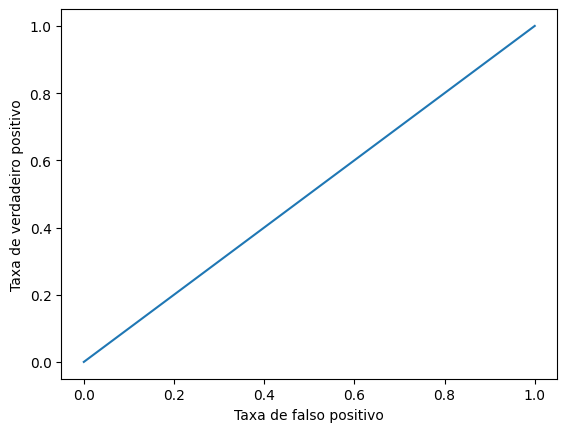

In [546]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, Y_proba)
plt.plot(fpr, tpr)
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')

print(f'Score AUC do 1º modelo: {roc_auc_score(Y, Y_proba)}')

Score AUC do 1º modelo: 0.8303602105263159


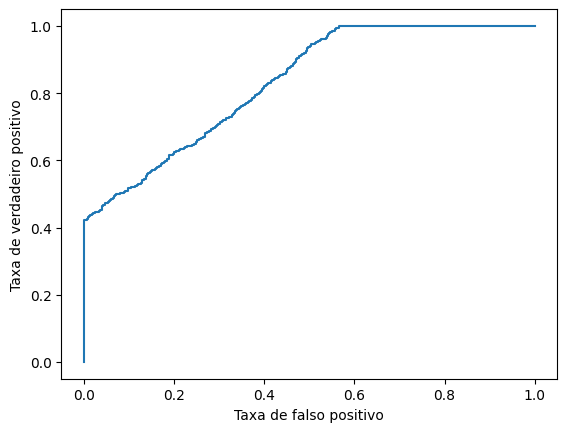

In [547]:


fpr, tpr, thresholds = roc_curve(Y, Y_proba_2)
plt.plot(fpr, tpr)
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')

print(f'Score AUC do 1º modelo: {roc_auc_score(Y, Y_proba_2)}')

## K-nearest neighbors (KNN) - K vizinhos mais próximos

Um algoritmo que tem como objetivo classificar novos pontos com base na classificação de uma amostra. Para esse novo ponto, são definidos K vizinhos mais próximos (até o máximo de n) dessa amostra e a classificação destes vizinhos influencia a classificação do novo ponto.

Tomemos a seguinte amostra hipotética com duas variáveis independentes, 'x' e 'y', e uma variável 'classes' dependente categórica:

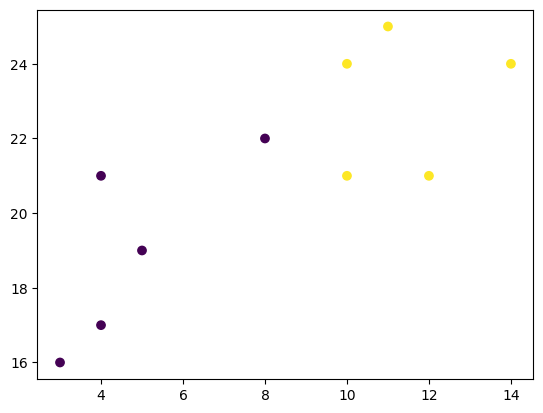

In [548]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

In [549]:
# Agora, é criado o modelo e ajustado com k=1

from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y)) # criando uma lista de pontos
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=1)

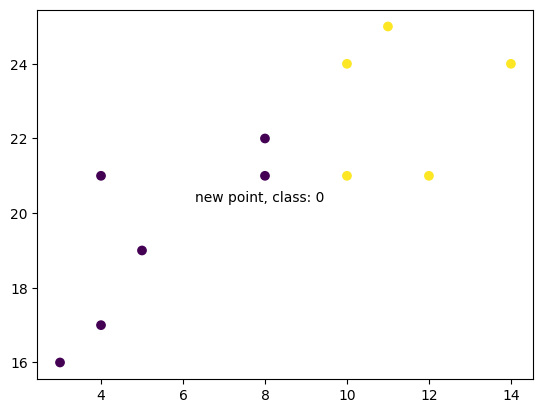

In [550]:
# Criando um novo ponto em 8,21
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

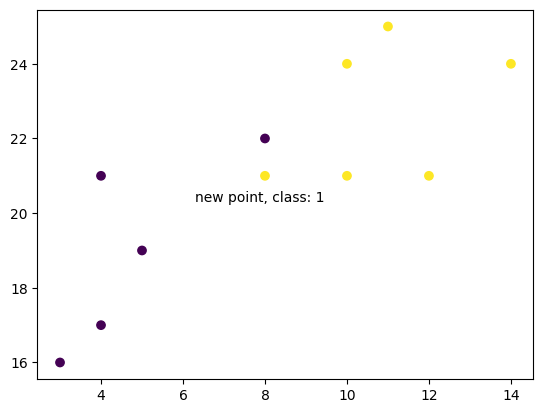

In [551]:
# Recriando o modelo com k=5

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data, classes)

new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

Dependendo da quantidade de pontos tratados como vizinhos, a classificação pode mudar.

### Completando valores nan

In [552]:
# Substituimos dois valores por nan (not a number)

classesna = [0, numpy.nan, 1, 0, 0, 1, numpy.nan, 0, 1, 1]

In [553]:
# Usaremos o pandas para separar esses valores.

data = pandas.DataFrame({'X':x,'Y':y,'Classes': classesna})

print(data)

    X   Y  Classes
0   4  21      0.0
1   5  19      NaN
2  10  24      1.0
3   4  17      0.0
4   3  16      0.0
5  11  25      1.0
6  14  24      NaN
7   8  22      0.0
8  10  21      1.0
9  12  21      1.0


O modelo será treinado com os valores que não possuem *nan* para prever os valores *nan*.

In [554]:
Data_Clean = data.dropna(0,inplace=False)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(Data_Clean[['X','Y']], Data_Clean['Classes'])

C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Temp\ipykernel_11768\4080542522.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  Data_Clean = data.dropna(0,inplace=False)


KNeighborsClassifier()

In [555]:
print(tuple(data.loc[1,['X','Y']]))

(5.0, 19.0)


In [556]:
data.loc[[1], ['X', 'Y']].values.reshape(1, 2)

array([[ 5, 19]], dtype=int64)

In [557]:
for i in data.index:
    if pandas.isna(data.loc[i,'Classes']):
        data.loc[i,'Classes'] = knn.predict(data.loc[[1], ['X', 'Y']].values.reshape(1, 2))[0]
        print(knn.predict(data.loc[i, ['X', 'Y']].values.reshape(1, 2))[0])

0.0
1.0


C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\fnsb.DESKTOP-7T10APS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Local

In [558]:
data

,X,Y,Classes
0,4,21,0.0
1,5,19,0.0
2,10,24,1.0
3,4,17,0.0
4,3,16,0.0
5,11,25,1.0
6,14,24,0.0
7,8,22,0.0
8,10,21,1.0
9,12,21,1.0


## Random Forest (Floresta Aleatória)

## Lasso

A técnica Lasso funciona adicionando uma penalização L1 ao erro quadrático médio (MSE) de um modelo de regressão linear, criando uma nova função de perda chamada função de perda Lasso. Ao minimizar esta função, alguns dos coeficientes dos atributos são forçados a se tornarem zero, o que equivale à exclusão desses atributos do modelo. Isso pode ajudar a lidar com a seleção de características e o problema de multicolinearidade, resultando em modelos mais simples e interpretáveis. Além disso, o uso de penalização L1 em vez de L2 também garante que apenas um coeficiente para cada grupo de correlacionados atributos seja escolhido.

## Parâmetros Comuns

Diversas funções do pacote scikit-learn possuem parâmetros recorrentes, que mais representam preferências do que alterações na execução de modelos, ajutes e testes.

***Verbosidade (verbose)***: int, default = 0

Diz respeito ao nível de detalhamento a ser impresso durante o processamento e pode assumir três valores diferentes:

* 0 (silencioso): Não exibe nenhuma saída durante o treinamento ou a validação do modelo.

* 1 (mínimo): Exibe apenas informações resumidas, como o número de iterações realizadas e o tempo gasto para treinar o modelo.

* 2 (normal): Exibe informações mais detalhadas, incluindo o progresso do treinamento, as métricas de desempenho, etc.

***random_state***: int, instância RandomState ou None, default = None

É uma semente (seed) para o gerador de números aleatórios utilizado em vários algoritmos, incluindo na inicialização de centros em clustering, na seleção aleatória de amostras em métodos de amostragem, entre outros. Ao definir o mesmo valor para o parâmetro random_state em diferentes execuções, garante-se que o mesmo resultado será obtido, pois a seqüência de números aleatórios gerados será a mesma.

***warm_start***

***n_jobs***

## Links Úteis

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring